# Reversion to metabolic autonomy drives (underpins) evolutionary rescue of a bacterial obligate mutualism

Ignacio J. Melero-Jiménez¹²³\*, Yael Sorokin¹, Ami Merlin¹, Alejandro Couce³\*† and Jonathan Friedman¹\*†  

¹ Institute of Environmental Sciences, The Hebrew University of Jerusalem, Rehovot, Israel  
² Universidad de Málaga, Andalucía Tech, Departamento de Botánica y Fisiología Vegetal, Campus de Teatinos, 29010, Málaga, Spain  
³ Centro de Biotecnología y Genómica de Plantas, Universidad Politécnica de Madrid (UPM), 28223 Madrid, Spain  

\*Corresponding author. Email: [imelero@uma.es](mailto:imelero@uma.es) (I.J.M.J); [a.couce@upm.es](mailto:a.couce@upm.es) (A.C.); [jonathan.friedman@mail.huji.ac.il](mailto:jonathan.friedman@mail.huji.ac.il) (J.F.)  

\*† These authors contributed equally to this work.


## Imports

In [128]:
##Libraries
import pandas as pd
import math
import sys
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from itertools import product
import scipy.optimize as optimize
from sklearn.metrics import r2_score
from itertools import product
import os
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter




## Analysis

### **1** Preproccessing data of evolutionary rescue experiment

The experiments were performed in a 96-well deep plate. Here, we established the position of each culture/control in the plate.

In [129]:
#Dictionary to define culture position.
#Culture Position
def set_values(row, value):
    return value[row]

#Key for culture vs control on 96 well plate

Culture_position={"A  1" : "culture", "B  1" : "control", "C  1" : "culture", "D  1" : "control", "E  1" : "culture","F  1" : "control" ,"G  1" : "culture" ,"H  1" : "control",
                 "A  2" : "control", "B  2" : "culture", "C  2" : "control", "D  2" : "culture", "E  2" : "control","F  2" : "culture" ,"G  2" : "control" ,"H  2" : "culture",
                "A  3" : "culture", "B  3" : "control", "C  3" : "culture", "D  3" : "control", "E  3" : "culture","F  3" : "control" ,"G  3" : "culture" ,"H  3" : "control",
                 "A  4" : "control", "B  4" : "culture", "C  4" : "control", "D  4" : "culture", "E  4" : "control","F  4" : "culture" ,"G  4" : "control" ,"H  4" : "culture",
                 "A  5" : "culture", "B  5" : "control", "C  5" : "culture", "D  5" : "control", "E  5" : "culture","F  5" : "control" ,"G  5" : "culture" ,"H  5" : "control",
                 "A  6" : "control", "B  6" : "culture", "C  6" : "control", "D  6" : "culture", "E  6" : "control","F  6" : "culture" ,"G  6" : "control" ,"H  6" : "culture",
                 "A  7" : "culture", "B  7" : "control", "C  7" : "culture", "D  7" : "control", "E  7" : "culture","F  7" : "control" ,"G  7" : "culture" ,"H  7" : "control",
                 "A  8" : "control", "B  8" : "culture", "C  8" : "control", "D  8" : "culture", "E  8" : "control","F  8" : "culture" ,"G  8" : "control" ,"H  8" : "culture",
                 "A  9" : "culture", "B  9" : "control", "C  9" : "culture", "D  9" : "control", "E  9" : "culture","F  9" : "control" ,"G  9" : "culture" ,"H  9" : "control",
                 "A  10" : "control", "B  10" : "culture", "C  10" : "control", "D  10" : "culture", "E  10" : "control","F  10" : "culture" ,"G  10" : "control" ,"H  10" : "culture",
                 "A  11" : "culture", "B  11" : "control", "C  11" : "culture", "D  11" : "control", "E  11" : "culture","F  11" : "control" ,"G  11" : "culture" ,"H  11" : "control",
                 "A  12" : "control", "B  12" : "culture", "C  12" : "control", "D  12" : "culture", "E  12" : "control","F  12" : "culture" ,"G  12" : "control","H  12" : "culture"}


Strain_position_P4={"A  1" : "M", "B  1" : "control", "C  1" : "M", "D  1" : "control", "E  1" : "M","F  1" : "control" ,"G  1" : "M" ,"H  1" : "control",
                 "A  2" : "control", "B  2" : "M", "C  2" : "control", "D  2" : "M", "E  2" : "control","F  2" : "M" ,"G  2" : "control" ,"H  2" : "M",
                "A  3" : "control", "B  3" : "control", "C  3" : "control", "D  3" : "control", "E  3" : "control","F  3" : "control" ,"G  3" : "control" ,"H  3" : "control",
                 "A  4" : "control", "B  4" : "control", "C  4" : "control", "D  4" : "control", "E  4" : "control","F  4" : "control" ,"G  4" : "control" ,"H  4" : "control",
                 "A  5" : "I", "B  5" : "control", "C  5" : "I", "D  5" : "control", "E  5" : "I","F  5" : "control" ,"G  5" : "I" ,"H  5" : "control",
                 "A  6" : "control", "B  6" : "I", "C  6" : "control", "D  6" : "I", "E  6" : "control","F  6" : "I" ,"G  6" : "control" ,"H  6" : "I",
                 "A  7" : "control", "B  7" : "control", "C  7" : "control", "D  7" : "control", "E  7" : "control","F  7" : "control" ,"G  7" : "control" ,"H  7" : "control",
                 "A  8" : "control", "B  8" : "control", "C  8" : "control", "D  8" : "control", "E  8" : "control","F  8" : "control" ,"G  8" : "control" ,"H  8" : "control",
                 "A  9" : "L", "B  9" : "control", "C  9" : "L", "D  9" : "control", "E  9" : "L","F  9" : "control" ,"G  9" : "L" ,"H  9" : "control",
                 "A  10" : "control", "B  10" : "L", "C  10" : "control", "D  10" : "L", "E  10" : "control","F  10" : "L" ,"G  10" : "control" ,"H  10" : "L",
                 "A  11" : "control", "B  11" : "control", "C  11" : "control", "D  11" : "control", "E  11" : "control","F  11" : "control" ,"G  11" : "control" ,"H  11" : "control",
                 "A  12" : "control", "B  12" : "control", "C  12" : "control", "D  12" : "control", "E  12" : "control","F  12" : "control" ,"G  12" : "control","H  12" : "control"}

#### Database with the OD values from the 20 transfers.

In [130]:
# Get the current working directory
base_directory = os.getcwd()

# Full path to the base directory of the Python code
base_directory = os.path.join(base_directory)


In [131]:
base_directory

'/Users/ignaciojosemelerojimenez/Desktop/Python Code'

In [132]:
#Transfer 1

# Relative paths to the files
file1_T1 = os.path.join(base_directory, "Data", "Transfer data", "T1", "P1.CSV")
file2_T1 = os.path.join(base_directory, "Data", "Transfer data", "T1", "P2.CSV")
file4_T1 = os.path.join(base_directory, "Data", "Transfer data", "T1", "P4.CSV")

# Useful columns
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Read files into DataFrames
Plate_1 = pd.read_csv(file1_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="1" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T1=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="1" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T1=P2


#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']=P4['well'].apply(set_values, args =(Strain_position_P4,))
P4['Time point']="1" #Time point (Transference)
P4['Culture condition']="mono-culture" #Mono or co culture
P4['Interaction']="No interaction"
P4['Salinity']="0" #Specie
P4['PNP']="0" #Specie
P4['Culture'] = P4['well'].apply(set_values, args =(Culture_position,))
mean_blank = P4.loc[P4['Culture']=='control', 'value'].mean()
P4["OD600"] = P4["value"] - mean_blank
P4.drop(P4.loc[P4['Culture']=='control'].index, inplace=True)
P4.drop(P4.loc[P4['Strain']=='control'].index, inplace=True)
P4_T1=P4
wells_to_remove = ['B  2', 'D  2', 'F  2', 'H  2']
P4_T1 = P4_T1[~P4_T1['well'].isin(wells_to_remove)]


In [133]:
#transfer 2

# Relative paths to the files
file1_T2 = os.path.join(base_directory, "Data", "Transfer data", "T2", "P1.CSV")
file2_T2 = os.path.join(base_directory, "Data", "Transfer data", "T2", "P2.CSV")
file4_T2 = os.path.join(base_directory, "Data", "Transfer data", "T2", "P4.CSV")

#useful colums
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T2, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T2, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_4= pd.read_csv(file4_T2, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="2" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T2=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="2" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T2=P2


#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']=P4['well'].apply(set_values, args =(Strain_position_P4,))
P4['Time point']="2" #Time point (Transference)
P4['Culture condition']="mono-culture" #Mono or co culture
P4['Interaction']="No interaction"
P4['Salinity']="0" #Specie
P4['PNP']="0" #Specie
P4['Culture'] = P4['well'].apply(set_values, args =(Culture_position,))
mean_blank = P4.loc[P4['Culture']=='control', 'value'].mean()
P4["OD600"] = P4["value"] - mean_blank
P4.drop(P4.loc[P4['Culture']=='control'].index, inplace=True)
P4.drop(P4.loc[P4['Strain']=='control'].index, inplace=True)
P4_T2=P4


In [134]:
#Transfer 3

# Relative paths to the files
file1_T3 = os.path.join(base_directory, "Data", "Transfer data", "T3", "P1.CSV")
file2_T3 = os.path.join(base_directory, "Data", "Transfer data", "T3", "P2.CSV")
file4_T3 = os.path.join(base_directory, "Data", "Transfer data", "T3", "P4.CSV")

#useful colums
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T3, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T3, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_4= pd.read_csv(file4_T3, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="3" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T3=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="3" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T3=P2

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']=P4['well'].apply(set_values, args =(Strain_position_P4,))
P4['Time point']="3" #Time point (Transference)
P4['Culture condition']="mono-culture" #Mono or co culture
P4['Interaction']="No interaction"
P4['Salinity']="0" #Specie
P4['PNP']="0" #Specie
P4['Culture'] = P4['well'].apply(set_values, args =(Culture_position,))
mean_blank = P4.loc[P4['Culture']=='control', 'value'].mean()
P4["OD600"] = P4["value"] - mean_blank
P4.drop(P4.loc[P4['Culture']=='control'].index, inplace=True)
P4.drop(P4.loc[P4['Strain']=='control'].index, inplace=True)
P4_T3=P4


In [135]:
#transfer 4 (stress)

# Relative paths to the files
file1_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P1.CSV")
file2_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P2.CSV")
file5_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P5.CSV")
file6_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P6.CSV")
file8_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P8.CSV")
file9_T4 = os.path.join(base_directory, "Data", "Transfer data", "T4", "P9.CSV")


#useful colums
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T4, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="4" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T4=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="4" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T4=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="4" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T4=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="4" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T4=P6


#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="4" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T4=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="4" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T4=P9

In [136]:
#transfer 5 (stress)

# Relative paths to the files
file1_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P1.CSV")
file2_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P2.CSV")
file5_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P5.CSV")
file6_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P6.CSV")
file8_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P8.CSV")
file9_T5 = os.path.join(base_directory, "Data", "Transfer data", "T5", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T5, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="5" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T5=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="5" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T5=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="5" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T5=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="5" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T5=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="5" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T5=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="5" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T5=P9

In [137]:
#transfer 6 (stress)

# Relative paths to the files
file1_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P1.CSV")
file2_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P2.CSV")
file5_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P5.CSV")
file6_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P6.CSV")
file8_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P8.CSV")
file9_T6 = os.path.join(base_directory, "Data", "Transfer data", "T6", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T6, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="6" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T6=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="6" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T6=P2


#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="6" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T6=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="6" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T6=P6



#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="6" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T6=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="6" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T6=P9



In [138]:
#transfer 7

# Relative paths to the files
file1_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P1.CSV")
file2_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P2.CSV")
file5_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P5.CSV")
file6_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P6.CSV")
file8_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P8.CSV")
file9_T7 = os.path.join(base_directory, "Data", "Transfer data", "T7", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T7, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="7" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T7=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="7" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T7=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="7" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T7=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="7" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T7=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="7" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T7=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="7" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T7=P9


In [139]:
#transfer 8

# Relative paths to the files
file1_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P1.CSV")
file2_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P2.CSV")
file5_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P5.CSV")
file6_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P6.CSV")
file8_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P8.CSV")
file9_T8 = os.path.join(base_directory, "Data", "Transfer data", "T8", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T8, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="8" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T8=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="8" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T8=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="8" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T8=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="8" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T8=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="8" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T8=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="8" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T8=P9

In [140]:
#transfer 9

# Relative paths to the files
file1_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P1.CSV")
file2_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P2.CSV")
file5_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P5.CSV")
file6_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P6.CSV")
file8_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P8.CSV")
file9_T9 = os.path.join(base_directory, "Data", "Transfer data", "T9", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T9, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="9" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T9=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="9" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T9=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="9" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T9=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="9" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T9=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="9" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T9=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="9" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T9=P9

In [141]:
#transfer 10

# Relative paths to the files
file1_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P1.CSV")
file2_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P2.CSV")
file5_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P5.CSV")
file6_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P6.CSV")
file8_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P8.CSV")
file9_T10 = os.path.join(base_directory, "Data", "Transfer data", "T10", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T10, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="10" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T10=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="10" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T10=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="10" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T10=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="10" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T10=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="10" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T10=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="10" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T10=P9

In [142]:
#transfer 11

# Relative paths to the files
file1_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P1.CSV")
file2_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P2.CSV")
file5_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P5.CSV")
file6_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P6.CSV")
file8_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P8.CSV")
file9_T11 = os.path.join(base_directory, "Data", "Transfer data", "T11", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T11, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="11" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T11=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="11" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T11=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="11" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T11=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="11" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T11=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="11" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T11=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="11" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T11=P9

In [143]:
#transfer 12

# Relative paths to the files
file1_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P1.CSV")
file2_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P2.CSV")
file5_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P5.CSV")
file6_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P6.CSV")
file8_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P8.CSV")
file9_T12 = os.path.join(base_directory, "Data", "Transfer data", "T12", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T12, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="12" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T12=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="12" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T12=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="12" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T12=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="12" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T12=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="12" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T12=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="12" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T12=P9

In [144]:
#transfer 13

# Relative paths to the files
file1_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P1.CSV")
file2_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P2.CSV")
file5_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P5.CSV")
file6_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P6.CSV")
file8_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P8.CSV")
file9_T13 = os.path.join(base_directory, "Data", "Transfer data", "T13", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T13, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="13" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T13=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="13" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T13=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="13" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T13=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="13" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T13=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="13" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T13=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="13" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T13=P9

In [145]:
#transfer 14

# Relative paths to the files
file1_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P1.CSV")
file2_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P2.CSV")
file5_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P5.CSV")
file6_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P6.CSV")
file8_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P8.CSV")
file9_T14 = os.path.join(base_directory, "Data", "Transfer data", "T14", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T14, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="14" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T14=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="14" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T14=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="14" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T14=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="14" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T14=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="14" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T14=P8


#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="14" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T14=P9


In [146]:
#transfer 15

# Relative paths to the files
file1_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P1.CSV")
file2_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P2.CSV")
file5_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P5.CSV")
file6_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P6.CSV")
file8_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P8.CSV")
file9_T15 = os.path.join(base_directory, "Data", "Transfer data", "T15", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T15, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="15" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T15=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="15" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T15=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="15" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T15=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="15" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T15=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="15" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T15=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="15" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T15=P9

In [147]:
#transfer 16

# Relative paths to the files
file1_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P1.CSV")
file2_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P2.CSV")
file5_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P5.CSV")
file6_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P6.CSV")
file8_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P8.CSV")
file9_T16 = os.path.join(base_directory, "Data", "Transfer data", "T16", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T16, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="16" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T16=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="16" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T16=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="16" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T16=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="16" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T16=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="16" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T16=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="16" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T16=P9

In [148]:
#transfer 17

# Relative paths to the files
file1_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P1.CSV")
file2_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P2.CSV")
file5_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P5.CSV")
file6_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P6.CSV")
file8_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P8.CSV")
file9_T17 = os.path.join(base_directory, "Data", "Transfer data", "T17", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T17, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="17" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T17=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="17" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T17=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="17" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T17=P5


#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="17" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T17=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="17" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T17=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="17" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T17=P9

In [149]:
#transfer 18

# Relative paths to the files
file1_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P1.CSV")
file2_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P2.CSV")
file5_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P5.CSV")
file6_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P6.CSV")
file8_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P8.CSV")
file9_T18 = os.path.join(base_directory, "Data", "Transfer data", "T18", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T18, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="18" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T18=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="18" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T18=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="18" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T18=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="18" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T18=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="18" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T18=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="18" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T18=P9

In [150]:
#transfer 19

# Relative paths to the files
file1_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P1.CSV")
file2_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P2.CSV")
file5_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P5.CSV")
file6_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P6.CSV")
file8_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P8.CSV")
file9_T19 = os.path.join(base_directory, "Data", "Transfer data", "T19", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T19, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="19" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T19=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="19" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T19=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="19" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T19=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="19" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T19=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="19" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T19=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="19" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T19=P9

In [151]:
#transfer 20
# Relative paths to the files
file1_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P1.CSV")
file2_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P2.CSV")
file5_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P5.CSV")
file6_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P6.CSV")
file8_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P8.CSV")
file9_T20 = os.path.join(base_directory, "Data", "Transfer data", "T20", "P9.CSV")

# Useful columns
Col=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1= pd.read_csv(file1_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_2= pd.read_csv(file2_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_5= pd.read_csv(file5_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_6= pd.read_csv(file6_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_8= pd.read_csv(file8_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})
Plate_9= pd.read_csv(file9_T20, skiprows=7,usecols=Col).loc[0:8].rename(columns={'Unnamed: 1':'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="WT" #Strain combination
P1['Time point']="20" #Time point (Transference)
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="No interaction"
P1['Salinity']="0" #Specie
P1['PNP']="0" #Specie
P1['Culture'] = P1['well'].apply(set_values, args =(Culture_position,))
mean_blank = P1.loc[P1['Culture']=='control', 'value'].mean()
P1["OD600"] = P1["value"] - mean_blank
P1.drop(P1.loc[P1['Culture']=='control'].index, inplace=True)
P1_T20=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="M+I" #Strain combination
P2['Time point']="20" #Time point (Transference)
P2['Culture condition']="co-culture" #Mono or co culture
P2['Interaction']="Obligate mutualism"
P2['Salinity']="0" #Specie
P2['PNP']="0" #Specie
P2['Culture'] = P2['well'].apply(set_values, args =(Culture_position,))
mean_blank = P2.loc[P2['Culture']=='control', 'value'].mean()
P2["OD600"] = P2["value"] - mean_blank
P2.drop(P2.loc[P2['Culture']=='control'].index, inplace=True)
P2_T20=P2

#Plate 5
P5=Plate_5.melt(id_vars='row')
P5['variable']=P5['variable'].astype(str)
P5['well']=P5['row']+P5['variable'] #well name
P5['Specie']="E. coli" #Specie
P5['Strain']="WT" #Strain combination
P5['Time point']="20" #Time point (Transference)
P5['Culture condition']="Mono-culture" #Mono or co culture
P5['Interaction']="No interaction"
P5['Salinity']="3" #Specie
P5['PNP']="0" #Specie
P5['Culture'] = P5['well'].apply(set_values, args =(Culture_position,))
mean_blank = P5.loc[P5['Culture']=='control', 'value'].mean()
P5["OD600"] = P5["value"] - mean_blank
P5.drop(P5.loc[P5['Culture']=='control'].index, inplace=True)
P5_T20=P5

#Plate 6
P6=Plate_6.melt(id_vars='row')
P6['variable']=P6['variable'].astype(str)
P6['well']=P6['row']+P6['variable'] #well name
P6['Specie']="E. coli" #Specie
P6['Strain']="M+I" #Strain combination
P6['Time point']="20" #Time point (Transference)
P6['Culture condition']="co-culture" #Mono or co culture
P6['Interaction']="Obligate mutualism"
P6['Salinity']="3" #Specie
P6['PNP']="0" #Specie
P6['Culture'] = P6['well'].apply(set_values, args =(Culture_position,))
mean_blank = P6.loc[P6['Culture']=='control', 'value'].mean()
P6["OD600"] = P6["value"] - mean_blank
P6.drop(P6.loc[P6['Culture']=='control'].index, inplace=True)
P6_T20=P6

#Plate 8
P8=Plate_8.melt(id_vars='row')
P8['variable']=P8['variable'].astype(str)
P8['well']=P8['row']+P8['variable'] #well name
P8['Specie']="E. coli" #Specie
P8['Strain']="WT" #Strain combination
P8['Time point']="20" #Time point (Transference)
P8['Culture condition']="Mono-culture" #Mono or co culture
P8['Interaction']="No interaction"
P8['Salinity']="0" #Specie
P8['PNP']="0.4" #Specie
P8['Culture'] = P8['well'].apply(set_values, args =(Culture_position,))
mean_blank = P8.loc[P8['Culture']=='control', 'value'].mean()
P8["OD600"] = P8["value"] - mean_blank
P8.drop(P8.loc[P8['Culture']=='control'].index, inplace=True)
P8_T20=P8

#Plate 9
P9=Plate_9.melt(id_vars='row')
P9['variable']=P9['variable'].astype(str)
P9['well']=P9['row']+P9['variable'] #well name
P9['Specie']="E. coli" #Specie
P9['Strain']="M+I" #Strain combination
P9['Time point']="20" #Time point (Transference)
P9['Culture condition']="co-culture" #Mono or co culture
P9['Interaction']="Obligate mutualism"
P9['Salinity']="0" #Specie
P9['PNP']="0.4" #Specie
P9['Culture'] = P9['well'].apply(set_values, args =(Culture_position,))
mean_blank = P9.loc[P9['Culture']=='control', 'value'].mean()
P9["OD600"] = P9["value"] - mean_blank
P9.drop(P9.loc[P9['Culture']=='control'].index, inplace=True)
P9_T20=P9

In [152]:
#Database from the experiment

df= pd.concat([P1_T1,P2_T1,P4_T1,
                P1_T2,P2_T2,P4_T2,
               P1_T3,P2_T3,P4_T3,
                P1_T4,P2_T4,
               P1_T5,P2_T5,
                P1_T6,P2_T6,
                P1_T7,P2_T7,
               P1_T8,P2_T8,
               P1_T9,P2_T9,
               P1_T10,P2_T10,
               P1_T11,P2_T11,
                P1_T12,P2_T12,
               P1_T13,P2_T13,
               P1_T14,P2_T14,
               P1_T15,P2_T15,
               P1_T16,P2_T16,
                P1_T17,P2_T17,
               P1_T18,P2_T18,
               P1_T19,P2_T19,
               P1_T20,P2_T20,]) #No stress database

df_salinity = pd.concat([P1_T1,P2_T1,
                P1_T2,P2_T2,
                P1_T3,P2_T3,
                P5_T4,P6_T4,
                P5_T5,P6_T5,
                P5_T6,P6_T6,
                P5_T7,P6_T7,
                P5_T8,P6_T8,
                P5_T9,P6_T9,
                P5_T10,P6_T10,
                P5_T11,P6_T11,
                P5_T12,P6_T12,
                P5_T13,P6_T13,
                P5_T14,P6_T14,
                P5_T15,P6_T15,
                P5_T16,P6_T16,
                P5_T17,P6_T17,
                P5_T18,P6_T18,
                P5_T19,P6_T19,
                P5_T20,P6_T20,]) #Salinity database

df_PNP = pd.concat([P1_T1,P2_T1,
                P1_T2,P2_T2,
                P1_T3,P2_T3,
                P8_T4,P9_T4,
                P8_T5,P9_T5,
                P8_T6,P9_T6,
                P8_T7,P9_T7,
                P8_T8,P9_T8,
                P8_T9,P9_T9,
                P8_T10,P9_T10,
                P8_T11,P9_T11,
                P8_T12,P9_T12,
                P8_T13,P9_T13,
                P8_T14,P9_T14,
                P8_T15,P9_T15,
                P8_T16,P9_T16,
                 P8_T17,P9_T17,
                 P8_T18,P9_T18,
                 P8_T19,P9_T19,
                 P8_T20,P9_T20,]) #PNP database



## Figure 2A

Population dynamics of the prototrophic strain (gray) and the obligate mutualism (green) in three different stress treatments (no stress, salinity, and PNP). The green background indicates periods without stress, while the red and purple background indicate exposure to salinity or PNP, correspondingly. The experiment consisted of 46 independent populations for each treatment.

In [153]:
# Filter for Mono-culture condition with the WT strain
df1 = df[df['Strain'].isin(['M+I', 'WT'])]
df1['Combined'] = df1['well'] + '_' + df1['Interaction']
df1 = df1.drop(df1[(df1['Culture condition'] == 'mono-culture') & (df1['Strain'] != 'WT')].index)

# Filter for Mono-culture condition with the WT strain
df2_salinity = df_salinity[df_salinity['Strain'].isin(['M+I', 'WT'])]  # M+I and WT
df2_salinity['Combined'] = df2_salinity['well'] + '_' + df2_salinity['Interaction']
# Filter for Mono-culture condition with the WT strain
df2 = df2_salinity.drop(df2_salinity[(df2_salinity['Culture condition'] == 'mono-culture') & (df2_salinity['Strain'] != 'WT')].index)

# Filter for Mono-culture condition with the WT strain
df3_pnp = df_PNP[df_PNP['Strain'].isin(['M+I', 'WT'])]  # M+I and WT
df3_pnp['Combined'] = df3_pnp['well'] + '_' + df3_pnp['Interaction']
# Filter for Mono-culture condition with the WT strain
df3 = df3_pnp.drop(df3_pnp[(df3_pnp['Culture condition'] == 'mono-culture') & (df3_pnp['Strain'] != 'WT')].index)


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2554887523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Combined'] = df1['well'] + '_' + df1['Interaction']


Function to create a smoothed line plot with scatter points

In [154]:
# Function to create a smoothed line plot with scatter points
def create_smoothed_plot(ax, df_m_plus_i, df_wt, color_m_plus_i, color_wt, title):
    sns.lineplot(data=df_m_plus_i, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_m_plus_i], linewidth=2, legend=False, ax=ax,alpha=0.2)
    sns.scatterplot(data=df_m_plus_i, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_m_plus_i], s=50, alpha=0.8, legend=False, ax=ax)

    sns.lineplot(data=df_wt, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_wt], linewidth=2, legend=False, ax=ax,alpha=0.2)
    sns.scatterplot(data=df_wt, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_wt], s=50, alpha=0.8, legend=False, ax=ax)

    ax.set_title(title)


Salinity data Smooth

In [155]:
# Filter only the 'M+I' strain
df2_salinity_m_plus_i = df2_salinity[df2_salinity['Strain'] == 'M+I'].copy()

# Convert the 'Time point' variable to numeric type
df2_salinity_m_plus_i['Time point'] = pd.to_numeric(df2_salinity_m_plus_i['Time point'], errors='coerce')

# Sort by 'Time point' to ensure it's in numeric order
df2_salinity_m_plus_i.sort_values(by=['well', 'Time point'], inplace=True)

# Calculate the moving average only for 'M+I'
window_size = 3
df2_salinity_m_plus_i['Smoothed_OD600'] = df2_salinity_m_plus_i.groupby('well')['OD600'].transform(
    lambda x: x.rolling(window=window_size, center=True).mean()
)

# Reset the index
df2_salinity_m_plus_i.reset_index(drop=True, inplace=True)

# Filter only the 'WT' strain
df2_salinity_wt = df2_salinity[df2_salinity['Strain'] == 'WT'].copy()

# Convert the 'Time point' variable to numeric type
df2_salinity_wt['Time point'] = pd.to_numeric(df2_salinity_wt['Time point'], errors='coerce')

# Sort by 'Time point' to ensure it's in numeric order
df2_salinity_wt.sort_values(by=['well', 'Time point'], inplace=True)

# Calculate the moving average only for 'WT'
df2_salinity_wt['Smoothed_OD600'] = df2_salinity_wt.groupby('well')['OD600'].transform(
    lambda x: x.rolling(window=window_size, center=True).mean()
)

# Reset the index
df2_salinity_wt.reset_index(drop=True, inplace=True)


PNP data Smooth

In [156]:
# Filter only the 'M+I' strain
df3_pnp_m_plus_i = df3_pnp[df3_pnp['Strain'] == 'M+I'].copy()

# Convert the 'Time point' variable to numeric type
df3_pnp_m_plus_i['Time point'] = pd.to_numeric(df3_pnp_m_plus_i['Time point'], errors='coerce')

# Sort by 'Time point' to ensure it's in numeric order
df3_pnp_m_plus_i.sort_values(by=['well', 'Time point'], inplace=True)

# Calculate the moving average only for 'M+I'
window_size = 3
df3_pnp_m_plus_i['Smoothed_OD600'] = df3_pnp_m_plus_i.groupby('well')['OD600'].transform(
    lambda x: x.rolling(window=window_size, center=True).mean()
)

# Reset the index
df3_pnp_m_plus_i.reset_index(drop=True, inplace=True)

# Filter only the 'WT' strain
df3_pnp_wt = df3_pnp[df3_pnp['Strain'] == 'WT'].copy()

# Convert the 'Time point' variable to numeric type
df3_pnp_wt['Time point'] = pd.to_numeric(df3_pnp_wt['Time point'], errors='coerce')

# Sort by 'Time point' to ensure it's in numeric order
df3_pnp_wt.sort_values(by=['well', 'Time point'], inplace=True)

# Calculate the moving average only for 'WT'
df3_pnp_wt['Smoothed_OD600'] = df3_pnp_wt.groupby('well')['OD600'].transform(
    lambda x: x.rolling(window=window_size, center=True).mean()
)

# Reset the index
df3_pnp_wt.reset_index(drop=True, inplace=True)


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2754349167.py:3: UserWarning: 
The palette list has fewer values (1) than needed (48) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_m_plus_i, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_m_plus_i], linewidth=2, legend=False, ax=ax,alpha=0.2)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2754349167.py:4: UserWarning: 
The palette list has fewer values (1) than needed (48) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_m_plus_i, x="Time point", y="Smoothed_OD600", hue="well", palette=[color_m_plus_i], s=50, alpha=0.8, legend=False, ax=ax)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2754349167.py:6: UserWarning: 
The palette list has fewer values (1) than needed (48) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_wt, x="Time point", y="Smoothed_OD600", hue="wel

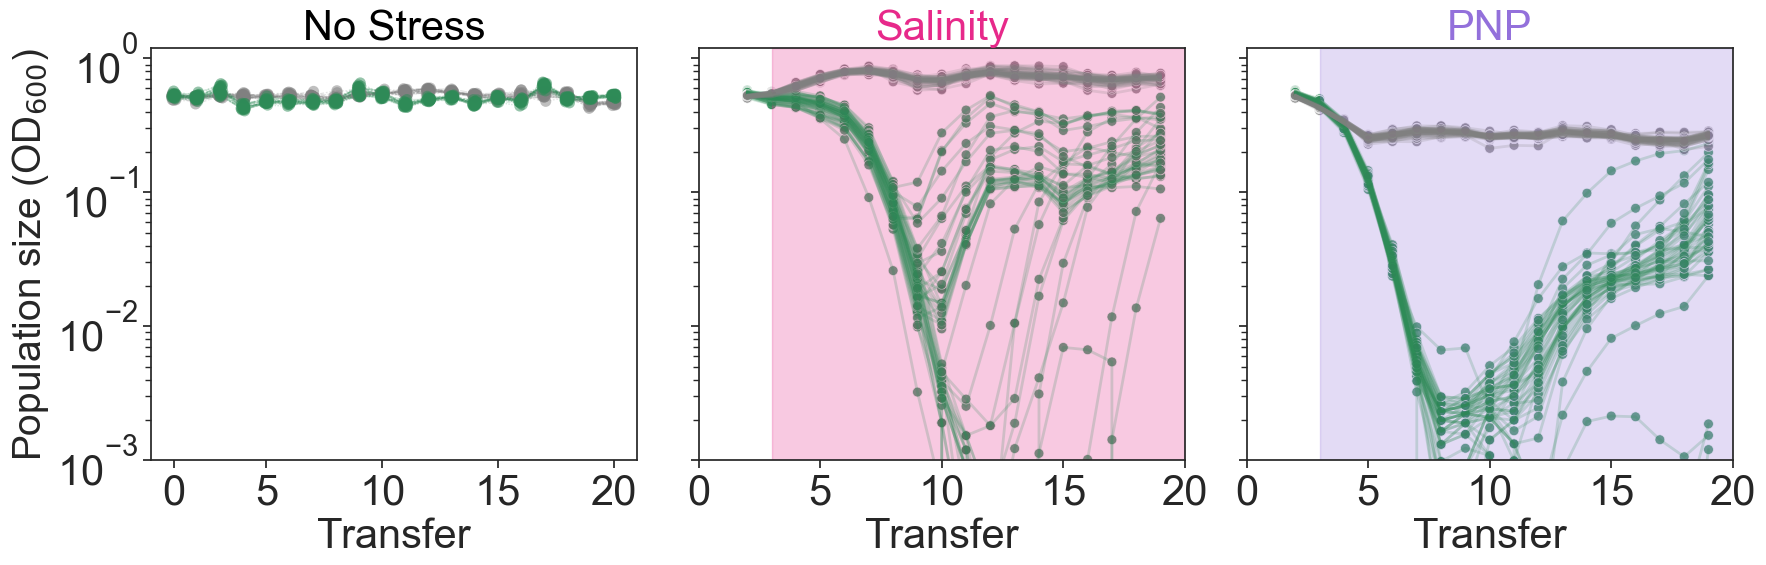

In [157]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5)  # Adjust font_scale to increase label sizes

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Color for 'M+I' interaction (combination of red and orange)
m_plus_i_color = '#2E8B57'

# Plot 1 - No Stress
ax1 = axs[0]
df1 = df[df['Strain'] != 'M+L']
df1['Combined'] = df1['well'] + '_' + df1['Interaction']
df1 = df1.drop(df1[(df1['Culture condition'] == 'mono-culture') & (df1['Strain'] != 'WT')].index)
custom_palette1 = {'WT': 'gray', 'M+I': m_plus_i_color}
sns.lineplot(data=df1, x="Time point", y="OD600", hue="Strain", ax=ax1, palette=custom_palette1, legend=False, linewidth=1, style="Combined", alpha=0.2)
sns.stripplot(data=df1, x="Time point", y="OD600", hue="Strain", ax=ax1, s=8, alpha=0.5, palette=custom_palette1, legend=False)
ax1.set_xlabel("Transfer", fontsize=30)
ax1.set_ylabel("Population size (OD$_{600}$)", fontsize=28)
ax1.set_title("No Stress", fontsize=30, color="black")
ax1.set_ylim(bottom=0.001, top=1.2)
ax1.set_yscale('log')
ax1.set_xlim(-1, 20)  # Ensure x-axis starts at 0
ax1.set_xticks([0, 4, 9, 14, 19])  # Set specific ticks including 0

# Optional: Manually add tick labels if needed
ax1.set_xticklabels(['0', '5', '10', '15', '20'])


# Plot 2 - High Stress (Salinity)
ax2 = axs[1]
create_smoothed_plot(ax2, df2_salinity_m_plus_i, df2_salinity_wt, m_plus_i_color, 'gray', 'Salinity')
ax2.axvspan(3, 20, alpha=0.25, color='#e7298a')
ax2.set_xlim(0, 20)  # Force x-axis to start at 0
ax2.set_xlabel("Transfer", fontsize=30)
ax2.set_xlim(0, 20)  # Ensure x-axis starts at 0
ax2.set_xticks([0, 5,10, 15, 20])  # Set specific ticks at 0, 5, 15, and 20
ax2.set_title("Salinity", fontsize=30, color="#e7298a")

# Plot 3 - PNP
ax3 = axs[2]
create_smoothed_plot(ax3, df3_pnp_m_plus_i, df3_pnp_wt, m_plus_i_color, 'gray', 'PNP')
ax3.axvspan(3, 20, alpha=0.25, color='#9370DB')
ax3.set_xlim(0, 20)  # Force x-axis to start at 0
ax3.set_xlim(0, 20)  # Ensure x-axis starts at 0
ax3.set_xticks([0, 5, 10, 15, 20])  # Set specific ticks at 0, 5, 15, and 20
ax3.set_xlabel("Transfer", fontsize=30)
ax3.set_title("PNP", fontsize=30, color="#9370DB")

# Adjust tick size
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=30)  # Adjust major ticks

# Adjust layout
plt.tight_layout()
plt.show()



## Figure 2 B

Box Plots representing the transfer when  community/populations begin to recover after stress exposition (OD600 shifts from negative to positive trend).

In [158]:
# Define a function to calculate the rescue point for each well
def calculate_rescue_transfer(df):
    # Group by well
    grouped = df.groupby('well')
    # Initialize a list to store the results
    rescue_transfers = []
    # Iterate over each group
    for name, group in grouped:
        # Filter the data starting from Time point 5
        group_filtered = group[group['Time point'] >= 5]
        # Find the first time point with an increase in OD600
        rescue_transfer = group_filtered.loc[group_filtered['Smoothed_OD600'].diff() > 0, 'Time point'].iloc[0]
        # Add the result to the list
        rescue_transfers.append((name, rescue_transfer))
    # Convert the list of tuples to a DataFrame
    rescue_transfers_df = pd.DataFrame(rescue_transfers, columns=['well', 'Rescue Transfer'])
    return rescue_transfers_df

# Calculate the rescue point for df2_salinity_m_plus_i and df3_pnp_m_plus_i
rescue_transfers_salinity = calculate_rescue_transfer(df2_salinity_m_plus_i)
rescue_transfers_pnp = calculate_rescue_transfer(df3_pnp_m_plus_i)

# Add a column to indicate stress
rescue_transfers_salinity['Stress'] = 'Salinity'
rescue_transfers_pnp['Stress'] = 'PNP'

# Combine the results into a single DataFrame
rescue_transfers_combined = pd.concat([rescue_transfers_salinity, rescue_transfers_pnp])

# Subtract 5 from the Rescue Transfer column
rescue_transfers_combined['Rescue Transfer'] = rescue_transfers_combined['Rescue Transfer'] - 3


In [159]:
from scipy.stats import mannwhitneyu

# Calculate mean, median, and standard deviation for each stress condition
mean_salinity = np.mean(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])
median_salinity = np.median(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])
std_dev_salinity = np.std(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])

mean_PNP = np.mean(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])
median_PNP = np.median(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])
std_dev_PNP = np.std(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])

# Print the results
print("Mean, Median, and SD for Salinity:")
print("Mean:", round(mean_salinity, 2))
print("Median:", round(median_salinity, 2))
print("SD:", round(std_dev_salinity, 2))

print("\nMean, Median, and SD for PNP:")
print("Mean:", round(mean_PNP, 2))
print("Median:", round(median_PNP, 2))
print("SD:", round(std_dev_PNP, 2))


# Filter data for each stress condition
salinity_data = rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer']
pnp_data = rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(salinity_data, pnp_data, alternative='two-sided')

# Print the p-value
print("\nP-value from Wilcoxon rank-sum test:", p_value)

# Interpret the result
alpha = 0.01
if p_value < alpha:
    print("The median differences are significant (reject the null hypothesis).")
else:
    print("The median differences are not significant (fail to reject the null hypothesis).")

Mean, Median, and SD for Salinity:
Mean: 8.83
Median: 8.0
SD: 1.75

Mean, Median, and SD for PNP:
Mean: 6.58
Median: 6.0
SD: 1.02

P-value from Wilcoxon rank-sum test: 4.23197810251641e-12
The median differences are significant (reject the null hypothesis).


In [160]:

# Calculate mean, median, and standard deviation for each stress condition
mean_salinity = np.mean(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])
median_salinity = np.median(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])
std_dev_salinity = np.std(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer'])

mean_PNP = np.mean(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])
median_PNP = np.median(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])
std_dev_PNP = np.std(rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer'])

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Stress': ['Salinity', 'PNP'],
    'Mean': [round(mean_salinity, 2), round(mean_PNP, 2)],
    'Median': [round(median_salinity, 2), round(median_PNP, 2)],
    'Standard Deviation': [round(std_dev_salinity, 2), round(std_dev_PNP, 2)]
})

print("Mean, Median, and Standard Deviation for each stress condition:")
print(results)

# Filter data for each stress condition
salinity_data = rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'Salinity']['Rescue Transfer']
pnp_data = rescue_transfers_combined[rescue_transfers_combined['Stress'] == 'PNP']['Rescue Transfer']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(salinity_data, pnp_data, alternative='two-sided')

# Create a DataFrame for the test result
test_results = pd.DataFrame({
    'Statistic': [stat],
    'P-value': [p_value]
})

print("\nP-value from Mann-Whitney U test:")
print(test_results)

# Interpret the result
alpha = 0.01
interpretation = "The median differences are not significant (fail to reject the null hypothesis)."
if p_value < alpha:
    interpretation = "The median differences are significant (reject the null hypothesis)."

print("\nInterpretation of the test result:")
print(interpretation)


Mean, Median, and Standard Deviation for each stress condition:
     Stress  Mean  Median  Standard Deviation
0  Salinity  8.83     8.0                1.75
1       PNP  6.58     6.0                1.02

P-value from Mann-Whitney U test:
   Statistic       P-value
0     2069.5  4.231978e-12

Interpretation of the test result:
The median differences are significant (reject the null hypothesis).


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3952141469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, width=0.5)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3952141469.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

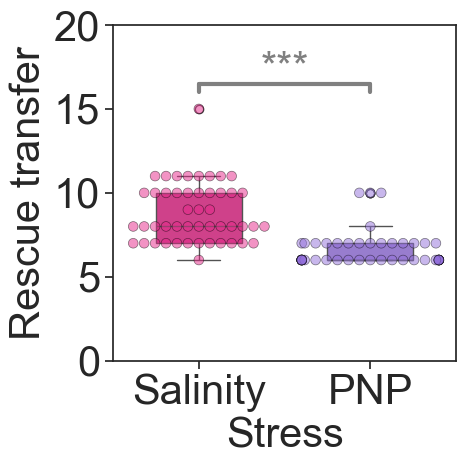

In [161]:
# Define the custom color palette with darker red tone for Salinity and purple tone for PNP
custom_palette = ["#e7298a", "#9370DB"]

# Create a plot to display the results
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, width=0.5)
ax.set_title('', fontsize=30)
ax.set_xlabel('Stress', fontsize=30)
ax.set_ylabel('Rescue transfer', fontsize=30)
ax.set_ylim(0, 20)  # Set the y-axis scale

# Create a swarmplot to display all points with larger size
sns.swarmplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5)

# Set integer ticks on the y-axis
ax.set_yticks(range(0, 25, 5))
ax.tick_params(axis='x', labelsize=30)  # Set the font size on the x-axis
ax.tick_params(axis='y', labelsize=30)  # Set the font size on the y-axis

# Calculate the positions for the vertical and horizontal lines
x_positions = ax.get_xticks()
line_y = rescue_transfers_combined['Rescue Transfer'].max() + 1.5

# Add short vertical lines at the centers of the boxplots
for x in x_positions:
    ax.plot([x, x], [line_y - 0.5, line_y], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax.plot([x_positions[0], x_positions[-1]], [line_y, line_y], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint = (x_positions[0] + x_positions[-1]) / 2
ax.annotate('***', xy=(midpoint, line_y + 0.2), ha='center', fontsize=30, color='grey')

# Adjust the x-axis limits to add more space
ax.set_xlim(-0.5, len(x_positions) - 0.5)

plt.tight_layout()
plt.show()


## Figure 2 C


The maximun recovery rate is a measure used to quantify the maximun change in population size (OD600) per transfer for each experimental culture after the exposition to stress.



In [162]:
def calculate_max_rate_of_change_for_wells(df):
    # Filter data from time point 10 to time point 20
    filtered_data = df[(df['Time point'] >= 9) & (df['Time point'] <= 20)]

    # Initialize a list to store the max rates of change per well
    max_rate_of_change_list = []

    # Calculate the max rate of change for each well
    for well, well_data in filtered_data.groupby('well'):
        well_rate_of_change = []

        for time_point in range(9, 20):
            start_time_point = time_point
            end_time_point = time_point + 1

            # Filter data for the well and the current interval
            well_interval_data = well_data[well_data['Time point'].between(start_time_point, end_time_point)]

            # Calculate the rate of change and add to the list
            rate_of_change = (well_interval_data['Smoothed_OD600'].iloc[-1] - well_interval_data['Smoothed_OD600'].iloc[0]) / (end_time_point - start_time_point)

            # Check if the rate of change is greater than 0
            if rate_of_change > 0:
                well_rate_of_change.append(rate_of_change)

        # Calculate the max rate of change for this well and add it to the list
        max_rate_of_change = max(well_rate_of_change) if well_rate_of_change else np.nan
        if max_rate_of_change is not np.nan and max_rate_of_change > 0:  # Add only if it's not NaN and greater than 0
            max_rate_of_change_list.append({'well': well, 'Max Rate of Change': max_rate_of_change})

    # Convert the list of dictionaries into a DataFrame
    max_rate_of_change_df = pd.DataFrame(max_rate_of_change_list)

    return max_rate_of_change_df

In [163]:
# Calculate the max rate of change for df2_salinity_m_plus_i
max_rate_of_change_df2 = calculate_max_rate_of_change_for_wells(df2_salinity_m_plus_i)

# Calculate the max rate of change for df3_pnp_m_plus_i
max_rate_of_change_df3 = calculate_max_rate_of_change_for_wells(df3_pnp_m_plus_i)

# Combine the results into a single DataFrame
max_rate_of_change_combined = pd.concat([max_rate_of_change_df2, max_rate_of_change_df3], ignore_index=True)
max_rate_of_change_combined['Stress'] = ['Salinity'] * len(max_rate_of_change_df2) + ['PNP'] * len(max_rate_of_change_df3)

# Remove rows with NaN values or very small max rate of change
max_rate_of_change_combined = max_rate_of_change_combined.dropna()
max_rate_of_change_combined = max_rate_of_change_combined[max_rate_of_change_combined['Max Rate of Change'] > 0.001]

In [164]:

# Calculate mean, median, and standard deviation for each stress group
mean_salinity = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'Salinity']['Max Rate of Change'].mean(), 2)
median_salinity = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'Salinity']['Max Rate of Change'].median(), 2)
std_dev_salinity = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'Salinity']['Max Rate of Change'].std(), 2)

mean_pnp = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'PNP']['Max Rate of Change'].mean(), 2)
median_pnp = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'PNP']['Max Rate of Change'].median(), 2)
std_dev_pnp = round(max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'PNP']['Max Rate of Change'].std(), 2)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Stress': ['Salinity', 'PNP'],
    'Mean': [mean_salinity, mean_pnp],
    'Median': [median_salinity, median_pnp],
    'Standard Deviation': [std_dev_salinity, std_dev_pnp]
})

print("Mean, Median, and Standard Deviation for each stress condition:")
print(results)

# Filter data for each stress condition
salinity_data = max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'Salinity']['Max Rate of Change']
pnp_data = max_rate_of_change_combined[max_rate_of_change_combined['Stress'] == 'PNP']['Max Rate of Change']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(salinity_data, pnp_data, alternative='two-sided')

# Create a DataFrame for the test result
test_results = pd.DataFrame({
    'Statistic': [stat],
    'P-value': [p_value]
})

print("\nP-value from Mann-Whitney U test:")
print(test_results)

# Interpret the result
alpha = 0.01  # Significance level
interpretation = "The median differences are not significant (fail to reject the null hypothesis)."
if p_value < alpha:
    interpretation = "The median differences are significant at the 0.01 level (reject the null hypothesis)."

print("\nInterpretation of the test result:")
print(interpretation)

Mean, Median, and Standard Deviation for each stress condition:
     Stress  Mean  Median  Standard Deviation
0  Salinity  0.09    0.08                0.04
1       PNP  0.03    0.02                0.02

P-value from Mann-Whitney U test:
   Statistic       P-value
0     1537.0  3.379747e-10

Interpretation of the test result:
The median differences are significant at the 0.01 level (reject the null hypothesis).


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/655190356.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, width=0.5)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/655190356.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5)


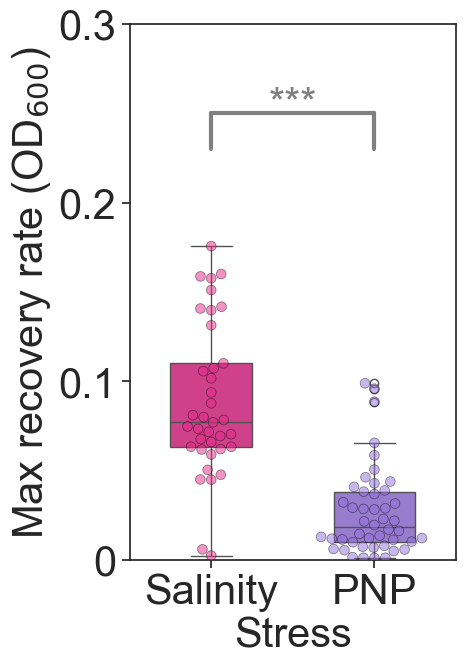

In [165]:
# Define custom_palette according to your preferences
custom_palette = ["#e7298a", "#9370DB"]  # Darker red tone for Salinity and purple tone for PNP


# Create a function to format the y-axis ticks
def custom_y_format(y, pos):
    if y == 0:
        return '0'
    else:
        return '{:.1f}'.format(y)

# Create a plot to display the results
plt.figure(figsize=(5, 7))
ax = sns.boxplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, width=0.5)
ax.set_title('', fontsize=30)
ax.set_xlabel('Stress', fontsize=30)
ax.set_ylabel('Max recovery rate (OD$_{600}$)', fontsize=30)

# Format y-axis using the custom formatter
ax.yaxis.set_major_formatter(FuncFormatter(custom_y_format))

# Create a swarmplot to display all points with larger size
sns.swarmplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5)

# Set ticks on the y-axis
max_y_value = 0.4
ax.set_yticks(np.arange(0, max_y_value + 0.05, 0.1))  # Adjust the step if necessary
ax.tick_params(axis='x', labelsize=30)  # Set the font size on the x-axis
ax.tick_params(axis='y', labelsize=30)  # Set the font size on the y-axis

# Calculate the positions for the vertical and horizontal lines
x_positions = ax.get_xticks()
line_y = 0.25  # Set to 0.25

# Add short vertical lines at the ends of the horizontal line
for x in x_positions:
    ax.plot([x, x], [line_y - 0.02, line_y], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax.plot([x_positions[0], x_positions[-1]], [line_y, line_y], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint = (x_positions[0] + x_positions[-1]) / 2
ax.annotate('***', xy=(midpoint, line_y - 0.001), ha='center', fontsize=30, color='grey')  # Adjusted down by 0.001

# Adjust the x-axis limits to add more space
ax.set_xlim(-0.5, len(x_positions) - 0.5)
ax.set_ylim(0, 0.3)  # Set y-axis limit to 0.3

plt.tight_layout()



### Figure 2 C-B together

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2992609496.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, width=0.5, ax=ax1)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2992609496.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5, ax=ax1)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripp

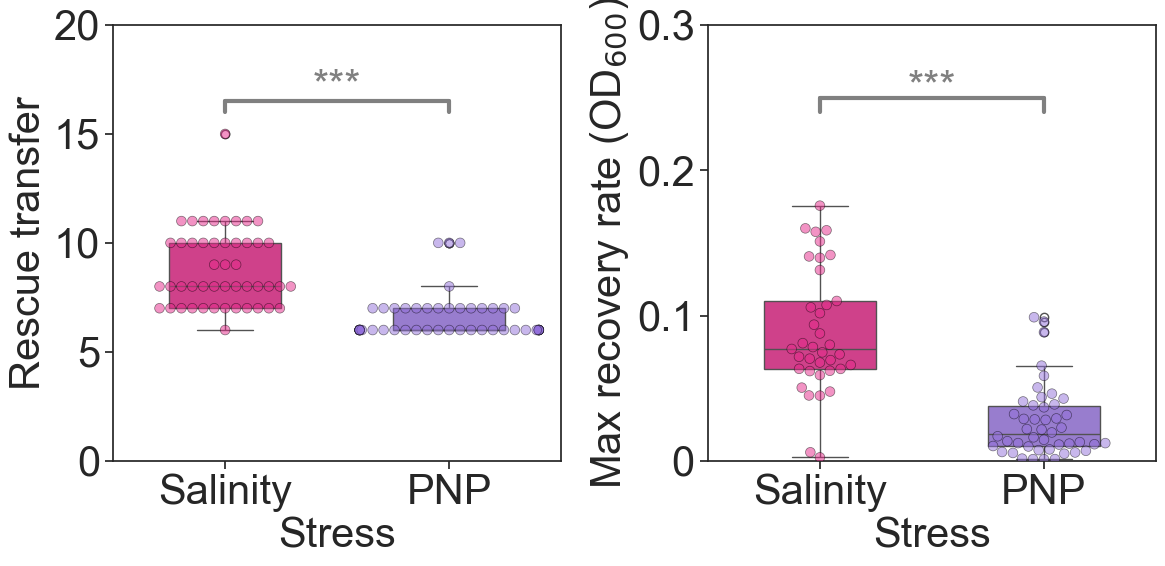

In [166]:
# Define the custom color palette with darker red tone for Salinity and purple tone for PNP
custom_palette = ["#e7298a", "#9370DB"]

# Crear una figura y ejes para ambos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Primer gráfico
sns.boxplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, width=0.5, ax=ax1)
ax1.set_title('', fontsize=30)
ax1.set_xlabel('Stress', fontsize=30)
ax1.set_ylabel('Rescue transfer', fontsize=30)
ax1.set_ylim(0, 20)  # Set the y-axis scale

# Create a swarmplot to display all points with larger size
sns.swarmplot(data=rescue_transfers_combined, x='Stress', y='Rescue Transfer', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5, ax=ax1)

# Set integer ticks on the y-axis
ax1.set_yticks(range(0, 25, 5))
ax1.tick_params(axis='x', labelsize=30)  # Set the font size on the x-axis
ax1.tick_params(axis='y', labelsize=30)  # Set the font size on the y-axis

# Calculate the positions for the vertical and horizontal lines
x_positions1 = ax1.get_xticks()
line_y1 = rescue_transfers_combined['Rescue Transfer'].max() + 1.5

# Add short vertical lines at the centers of the boxplots
for x in x_positions1:
    ax1.plot([x, x], [line_y1 - 0.5, line_y1], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax1.plot([x_positions1[0], x_positions1[-1]], [line_y1, line_y1], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint1 = (x_positions1[0] + x_positions1[-1]) / 2
ax1.annotate('***', xy=(midpoint1, line_y1 + 0.15), ha='center', fontsize=30, color='grey')

# Adjust the x-axis limits to add more space
ax1.set_xlim(-0.5, len(x_positions1) - 0.5)

# Segundo gráfico
# Define custom_palette according to your preferences
custom_palette = ["#e7298a", "#9370DB"]  # Darker red tone for Salinity and purple tone for PNP

# Create a function to format the y-axis ticks
def custom_y_format(y, pos):
    if y == 0:
        return '0'
    else:
        return '{:.1f}'.format(y)

sns.boxplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, width=0.5, ax=ax2)
ax2.set_title('', fontsize=30)
ax2.set_xlabel('Stress', fontsize=30)
ax2.set_ylabel('Max recovery rate (OD$_{600}$)', fontsize=30)

# Format y-axis using the custom formatter
ax2.yaxis.set_major_formatter(FuncFormatter(custom_y_format))

# Create a swarmplot to display all points with larger size
sns.swarmplot(data=max_rate_of_change_combined, x='Stress', y='Max Rate of Change', palette=custom_palette, size=7, edgecolor='k', linewidth=0.5, alpha=0.5, ax=ax2)

# Set ticks on the y-axis
max_y_value = 0.4
ax2.set_yticks(np.arange(0, max_y_value + 0.05, 0.1))  # Adjust the step if necessary
ax2.tick_params(axis='x', labelsize=30)  # Set the font size on the x-axis
ax2.tick_params(axis='y', labelsize=30)  # Set the font size on the y-axis

# Calculate the positions for the vertical and horizontal lines
x_positions2 = ax2.get_xticks()
line_y2 = 0.25  # Set to 0.25

# Add short vertical lines at the ends of the horizontal line
for x in x_positions2:
    ax2.plot([x, x], [line_y2 - 0.01, line_y2], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax2.plot([x_positions2[0], x_positions2[-1]], [line_y2, line_y2], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint2 = (x_positions2[0] + x_positions2[-1]) / 2
ax2.annotate('***', xy=(midpoint2, line_y2 - 0.001), ha='center', fontsize=30, color='grey')  # Adjusted down by 0.001

# Adjust the x-axis limits to add more space
ax2.set_xlim(-0.5, len(x_positions2) - 0.5)
ax2.set_ylim(0, 0.3)  # Set y-axis limit to 0.3

# Adjust layout to make sure plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


## Figure 2 D

The normalized population size \(OD$_{600}$)$^{normalized}$\) is calculated by dividing the mean optical density at 600 nm \(OD$_{600}$\) for 'M+I' strains by the mean \(OD$_{600}$\) for 'prototrophic' strain for the last three time points. The formula is expressed as:


\begin{equation}
    OD_{600}^{normalized} = \frac{OD_{600}^{M+I}}{OD_{600}^{prototrophic}}
\end{equation}

Where:
\begin{align*}
    & OD_{600}^{normalized} \quad \text{is the normalized population size,} \\
    & OD_{600}^{M+I} \quad \text{is the mean optical density at 600 nm for 'M+I' strains,} \\
    & OD_{600}^{prototrophic} \quad \text{is the mean optical density at 600 nm for 'WT' strains.}
\end{align*}

This equation provides a measure of the relative population size of 'M+I' strains compared to 'prototrophic' strains under different stress conditions.


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/412923627.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_last_three_filtered['OD600'] = combined_df_last_three_filtered['OD600'].apply(lambda x: x if x > 0 else float('nan'))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/412923627.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=last_three_transfers_mean, x='Stress', y='OD600_normalized', palette=custom_palette, size=6, edgecolor='k', linewidth=0.5, ax=ax, alpha=0.8, order=order)
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel

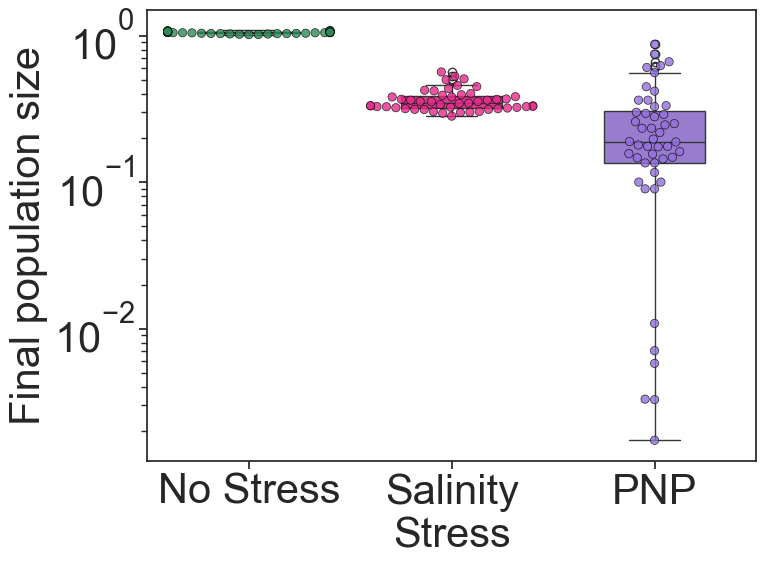

In [167]:
# Create a 'Stress' column for each dataset
df['Stress'] = 'No Stress'
df_salinity['Stress'] = 'Salinity'
df_PNP['Stress'] = 'PNP'

# Combine the three datasets
combined_df = pd.concat([df, df_salinity, df_PNP])

# Filter the data to select only the last three time points '
combined_df_last_three_filtered = combined_df[(combined_df['Time point'].isin(['18', '19', '20'])) | (combined_df['Stress'] == 'Salinity')]

# Replace all OD600 values less than or equal to 0 with NaN
combined_df_last_three_filtered['OD600'] = combined_df_last_three_filtered['OD600'].apply(lambda x: x if x > 0 else float('nan'))

# Calculate the mean of all WT values for the last three time points
mean_WT_OD600_last_three = combined_df_last_three_filtered[combined_df_last_three_filtered['Strain'] == 'WT'].groupby('Stress')['OD600'].mean()

# Combine the data for M+I in each stress
df_MplusI_last_three = combined_df_last_three_filtered[combined_df_last_three_filtered['Strain'] == 'M+I']

# Calculate the mean values for the last three time points for each well
last_three_transfers_mean = df_MplusI_last_three.groupby(['Stress', 'well'])['OD600'].mean().reset_index()

# Merge with the mean of all WT values for the last three time points
last_three_transfers_mean = pd.merge(last_three_transfers_mean, mean_WT_OD600_last_three.reset_index(), on='Stress', suffixes=('_M+I', '_WT'))

# Normalize data by dividing each value by the mean of all WT values for the last three time points
last_three_transfers_mean['OD600_normalized'] = last_three_transfers_mean['OD600_M+I'] / last_three_transfers_mean['OD600_WT']

# Define a custom color palette with vibrant colors
custom_palette = {"No Stress": "#2E8B57", "Salinity": "#e7298a", "PNP": "#9370DB"}  # Dark green for No Stress, darker red tone for Salinity, and purple tone for PNP

# Set the order of x-axis
order = ['No Stress','Salinity', 'PNP']

# Create a single plot for M+I data in each stress
fig, ax = plt.subplots(figsize=(8, 6))

# Create a swarmplot with custom palette and black edgecolor
sns.swarmplot(data=last_three_transfers_mean, x='Stress', y='OD600_normalized', palette=custom_palette, size=6, edgecolor='k', linewidth=0.5, ax=ax, alpha=0.8, order=order)

# Create boxplots with the same custom palette for M+I data
sns.boxplot(data=last_three_transfers_mean, x='Stress', y='OD600_normalized', palette=custom_palette, ax=ax, width=0.5, order=order)

ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.set_xlabel('Stress', fontsize=30)  # Update x-axis label and increase font size
ax.set_ylabel('Final population size', fontsize=30)  # Update y-axis label and increase font size
ax.tick_params(labelsize=30)  # Increase tick label font size

plt.tight_layout()
plt.show()

In [168]:
from scipy.stats import levene, mannwhitneyu

# Calculate median for each stress condition
median_no_stress = last_three_transfers_mean[last_three_transfers_mean['Stress'] == 'No Stress']['OD600_normalized'].median()
median_salinity = last_three_transfers_mean[last_three_transfers_mean['Stress'] == 'Salinity']['OD600_normalized'].median()
median_PNP = last_three_transfers_mean[last_three_transfers_mean['Stress'] == 'PNP']['OD600_normalized'].median()

# Create a DataFrame to display the medians
median_results = pd.DataFrame({
    'Stress Condition': ['No Stress', 'Salinity', 'PNP'],
    'Median OD600_normalized': [round(median_no_stress, 2), round(median_salinity, 2), round(median_PNP, 2)]
})

print("Median OD600_normalized for each stress condition:")
print(median_results)

# Filter M+I data for Salinity and drop NaN values
m_plus_i_salinity = df_MplusI_last_three[df_MplusI_last_three['Stress'] == 'Salinity']['OD600'].dropna()

# Filter M+I data for PNP and drop NaN values
m_plus_i_pnp = df_MplusI_last_three[df_MplusI_last_three['Stress'] == 'PNP']['OD600'].dropna()

# Perform Levene test for equality of variances
stat_levene, p_value_levene = levene(m_plus_i_salinity, m_plus_i_pnp)

# Create a DataFrame to display the Levene test results
levene_results = pd.DataFrame({
    'Statistic': [stat_levene],
    'P-value': [p_value_levene]
})

print("\nLevene Test between Salinity and PNP:")
print(levene_results)

# Interpret the result
alpha = 0.01  # Significance level
interpretation = "The variances are not significantly different (fail to reject the null hypothesis)."
if p_value_levene < alpha:
    interpretation = "The variances are significantly different (reject the null hypothesis)."

print("\nInterpretation of the Levene test result:")
print(interpretation)

# Perform the Mann-Whitney U test to compare the means of Salinity and PNP
stat_mannwhitneyu, p_value_mannwhitneyu = mannwhitneyu(m_plus_i_salinity, m_plus_i_pnp, alternative='two-sided')

# Create a DataFrame to display the Mann-Whitney U test results
mannwhitneyu_results = pd.DataFrame({
    'Statistic': [stat_mannwhitneyu],
    'P-value': [p_value_mannwhitneyu]
})

print("\nMann-Whitney U Test between Salinity and PNP:")
print(mannwhitneyu_results)

# Interpret the result of the Mann-Whitney U test
alpha = 0.05  # Significance level for the two-tailed test
interpretation_mannwhitneyu = "There is no significant difference between the groups (fail to reject the null hypothesis)."
if p_value_mannwhitneyu < alpha:
    interpretation_mannwhitneyu = "There is a significant difference between the groups (reject the null hypothesis)."

print("\nInterpretation of the Mann-Whitney U test result:")
print(interpretation_mannwhitneyu)


Median OD600_normalized for each stress condition:
  Stress Condition  Median OD600_normalized
0        No Stress                     1.05
1         Salinity                     0.35
2              PNP                     0.19

Levene Test between Salinity and PNP:
    Statistic       P-value
0  208.576866  4.972553e-43

Interpretation of the Levene test result:
The variances are significantly different (reject the null hypothesis).

Mann-Whitney U Test between Salinity and PNP:
   Statistic       P-value
0    88207.0  7.725324e-21

Interpretation of the Mann-Whitney U test result:
There is a significant difference between the groups (reject the null hypothesis).


## Figure 3 A.

Strains present at the end of the experiment. Colors indicate the presence of each strain in the communities as detected by PCR. 

In [169]:
# Create a 'Stress' column for each dataset
df['Stress'] = 'No Stress'
df_salinity['Stress'] = 'Salinity'
df_PNP['Stress'] = 'PNP'

# Combine the three datasets
combined_df = pd.concat([df, df_salinity, df_PNP])

# Filter the data to select only the time point 20
combined_df_final = combined_df[(combined_df['Time point'] == "20")]

In [170]:
# Filter events with OD600 greater than 0.01
filtered_events = combined_df_final[combined_df_final['OD600'] > 0.01]

# Count events by stress and strain
events_count_by_stress_and_strain = filtered_events.groupby(['Stress', 'Strain']).size()

print("Events with OD600 > 0.01 by stress and strain:")
print(events_count_by_stress_and_strain)


Events with OD600 > 0.01 by stress and strain:
Stress     Strain
No Stress  M+I       48
           WT        48
PNP        M+I       42
           WT        48
Salinity   M+I       35
           WT        48
dtype: int64


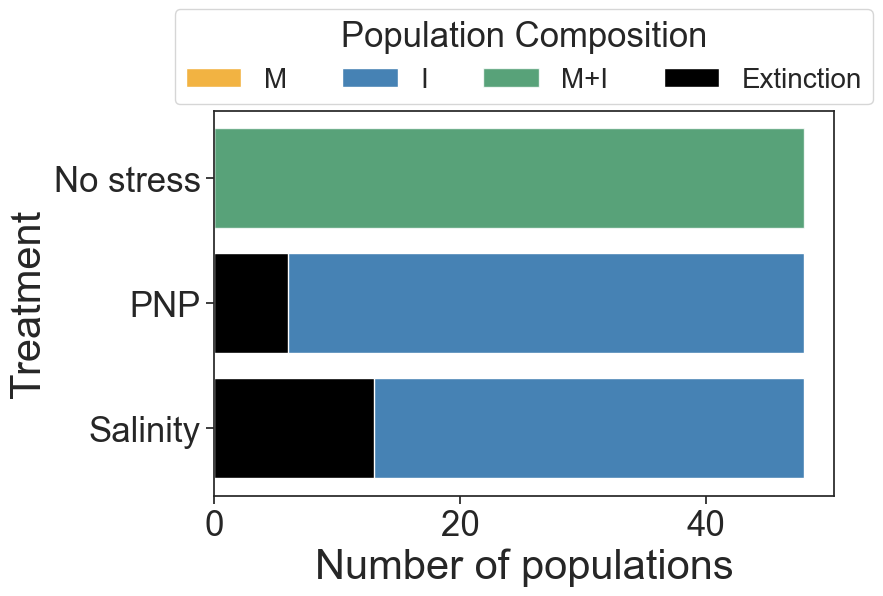

In [171]:
data = {
    'Extinction': [13, 6, 0],
    'Stress': ['Salinity', 'PNP', 'No stress'],
    'M': [0, 0, 0],
    'I': [48, 48, 0],
    'M+I': [0, 0, 48]
}

df = pd.DataFrame(data)

# Set the order of 'Population Type' for better visualization
order = ['M', 'I', 'M+I', 'Extinction']

# Define colors for 'M', 'I', 'M+I', 'Extinction'
colors = ['#F2B342', '#4682B4', '#2E8B57', 'black']

# Plot the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))

for pop_type in order:
    if pop_type == 'M+I':
        ax.barh(df['Stress'], df[pop_type], label=pop_type, color=colors.pop(0), alpha=0.8)
    else:
        ax.barh(df['Stress'], df[pop_type], label=pop_type, color=colors.pop(0))

plt.xlabel('Number of populations', fontsize=30)
plt.ylabel('Treatment', fontsize=30)

# Show legend above the chart with increased font size
legend = ax.legend(title='Population Composition', bbox_to_anchor=(0.5, 1.3), loc='upper center', ncol=4, fontsize=20, title_fontsize=25)

# Set tick label font size
ax.tick_params(axis='both', labelsize=25)

plt.show()


In [172]:
from scipy.stats import chi2_contingency, fisher_exact

# Create the contingency table
data = np.array([
    [37, 9],  # Salinity
    [41, 5]   # PNP
])

# Perform the chi-squared test
chi2, p_chi, dof, expected = chi2_contingency(data)

# Check if any expected frequencies are less than 5
if np.any(expected < 5):
    # Perform Fisher's Exact Test if any expected frequency is less than 5
    oddsratio, p_fisher = fisher_exact(data)
    test_used = "Fisher's Exact Test"
    p_value = p_fisher
else:
    # Use Chi-squared test if all expected frequencies are 5 or more
    test_used = "Chi-squared Test"
    p_value = p_chi

# Display the results
print(f"Test used: {test_used}")
print(f"p-value: {p_value}")
print("Expected frequencies:\n", expected)


Test used: Chi-squared Test
p-value: 0.38387932058785124
Expected frequencies:
 [[39.  7.]
 [39.  7.]]


## Figure 3B

Growth curves of recovered populations and of the auxotrophic ancestor of the ΔI strain in M9 without isoleucine addition. Different colors indicate the treatment from which the populations were isolated (purple from PNP, red from salinity and blue is the ancestor ΔI strain).

### Preprocesing data

In [173]:
#Create Dataframes
Location = os.path.join(base_directory, "Data", "GC_Figure_3B", "GC_72h.xlsx")

# Load the Excel file into a pandas DataFrame
od = pd.read_excel(Location, skiprows=28, nrows=433)
od.drop(['T° 600', 'Time', 	"Unnamed: 0"], axis=1, inplace=True)

#Remove blank
def normalize (row):
    blank=0.088
    row=(row-blank).clip(lower=0.001).round(3)
    return row

od=od.apply(normalize, axis=1)
od["Time"]=np.arange(0,len(od)) * 10 / 60
od_P1 = od[od['Time'] <= 72]

#Dictionary

# Path to the key file
location_key = os.path.join(base_directory, "Data", "GC_Figure_3B", "key_exp.xlsx")

# Load the key file into a pandas DataFrame
df = pd.read_excel(location_key, sheet_name='sheet_1')

# Create the dictionary from the DataFrame
sample_dict = dict(zip(df['Well name'], df['Population']))

# Create a list of all well locations in the plate
wellist = [''.join(i) for i in list(product(["A", "B", "C", "D", "E", "F", "G", "H"], ["{:d}".format(x) for x in range(1,13)]))]

# Create a dictionary with well locations as keys and corresponding sample names as values
dic_control = dict(zip(wellist, df['Population']))
dic_AA = dict(zip(wellist, df['AA']))

In [174]:
# Load the Google Sheet file into a pandas DataFrame
df_key = pd.read_excel(location_key, sheet_name='sheet_1')

# Create a dictionary with well locations as keys and corresponding sample names as values
sample_dic = dict(zip(wellist, df_key['Population']))

#####Plate 1

for well in dic_control.keys():
    ydata = od_P1[well].values  # OD values (in OD)
    xdata = od_P1['Time'].values  # time (in minutes)
    


# Create a list of dictionaries with the growth rate, carrying capacity, strain, AA, and salinity for each well
data_P1 = []
for well in sample_dic.keys():
    strain = dic_control[well]
    salinity = 0
    PNP = 0
    AA=dic_AA[well]
    data_P1.append({'Well': well, 'AA': AA,  'Strain': strain, 'Salinity': salinity, 'PNP': PNP,})


df_p1 = pd.DataFrame(data_P1)
df_p1 = pd.concat([df_p1])


df_p1.loc[df_p1['Well'] == 'B6', 'Strain'] = 'control'
df_p1

,Well,AA,Strain,Salinity,PNP
0,A1,0,Anc,0,0
1,A2,0,Anc,0,0
2,A3,0,Anc,0,0
3,A4,0,Anc,0,0
4,A5,0,Anc,0,0
...,...,...,...,...,...
91,H8,0,PNP_3,0,0
92,H9,0,PNP_3,0,0
93,H10,0,PNP_3,0,0
94,H11,0,PNP_3,0,0


In [175]:
# Grouping the strains of salinity and PNP into a single category
df_p1['Strain'] = df_p1['Strain'].apply(lambda x: 'Salinity' if 'Salinity' in x else ('PNP' if 'PNP' in x else x))

# Verifying the changes
print(df_p1['Strain'].unique())
df_p1


['Anc' 'control' 'Salinity' 'PNP' 'anc_bad']


,Well,AA,Strain,Salinity,PNP
0,A1,0,Anc,0,0
1,A2,0,Anc,0,0
2,A3,0,Anc,0,0
3,A4,0,Anc,0,0
4,A5,0,Anc,0,0
...,...,...,...,...,...
91,H8,0,PNP,0,0
92,H9,0,PNP,0,0
93,H10,0,PNP,0,0
94,H11,0,PNP,0,0


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/120050311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['Colors'] = df_p1['Strain'].map(lambda x: plot_info[x]['color'])
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/120050311.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['Labels'] = df_p1['Strain'].map(lambda x: plot_info[x]['label'])
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/120050311.py:59: UserWarning: Attempt to set non-

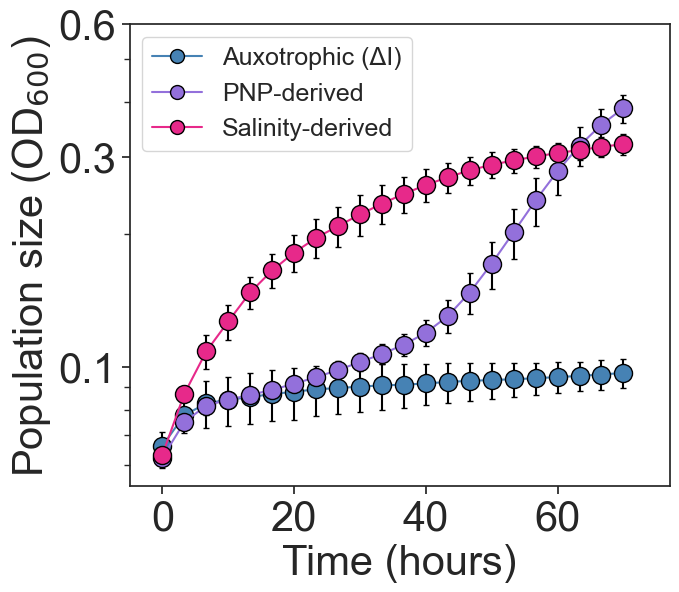

In [176]:
# Create a dictionary of colors and legend names for each strain
plot_info = {'Salinity': {'color': '#e7298a', 'label': 'Salinity-derived'},
             'Anc': {'color': '#4682B4', 'label': 'Auxotrophic (ΔI)'},
             'control': {'color': 'gray', 'label': 'control'},
             'PNP': {'color': '#9370DB', 'label': 'PNP-derived'}}

# Filter out rows with strain 'anc_bad' from df_p1
df_p1 = df_p1[df_p1['Strain'] != 'anc_bad']

# Map colors and legend labels to each strain
df_p1['Colors'] = df_p1['Strain'].map(lambda x: plot_info[x]['color'])
df_p1['Labels'] = df_p1['Strain'].map(lambda x: plot_info[x]['label'])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize lists to store legend labels and colors
legend_labels = ['Auxotrophic (ΔI)','PNP-derived', 'Salinity-derived']
legend_colors = []

# Group the data by strain
strain_grouped = df_p1.groupby('Strain')

# Iterate over each strain and plot the growth curves with error bars
for strain, strain_group in strain_grouped:
    # Skip the strains that need to be removed
    if strain in ["control"]:
        continue

    # Get the color for the strain
    color = plot_info[strain]['color']

    # Aggregate OD values for each strain
    od_values = pd.concat([od_P1[col] for col in strain_group['Well']], axis=1)
    mean_values = od_values.mean(axis=1)
    std_values = od_values.std(axis=1)

    # Exclude time points with NaN values
    valid_mean_values = mean_values.dropna()
    valid_std_values = std_values.dropna()
    valid_time_values = valid_mean_values.index * 10 / 60 # Convert time from minutes to hours

    # Plot the growth curve with error bars
    if valid_std_values.empty:
        sns.lineplot(x=valid_time_values[::20], y=valid_mean_values[::20], ax=ax, label=None, marker='o', markersize=20, linewidth=1, markeredgewidth=1, markeredgecolor='black', alpha=0.5, color=color)
    else:
        # Plot the growth curve with error bars
        ax.errorbar(valid_time_values[::20], valid_mean_values[::20], yerr=valid_std_values[::20], capsize=2, linestyle='-', marker='o', markersize=13, label=None, color=color, markeredgewidth=1, markeredgecolor='black', ecolor='black')  # Set ecolor to black for error bars

    # Store the legend label and color for the strain if it hasn't been stored already
    if strain not in legend_labels:
        legend_labels.append(strain)
        legend_colors.append(color)

# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

# Adjust the y-axis limits for the logarithmic scale
ax.set_ylim(0, 0.6)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time (hours)', fontsize=30)
ax.set_ylabel('Population size (OD$_{600}$)', fontsize=30)  # Subíndice 600 en el eje x

# Set the x-axis limit from 0 to 72 hours
ax.set_xlim(-5, 77)
# Set the y-axis ticks
ax.set_yticks([0.1, 0.3, 0.6])

# Add a legend for all strains
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color, markersize=10, markeredgewidth=1, markeredgecolor='black') for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_elements, fontsize=18, loc='upper left')

# Ajustar la posición de la leyenda
plt.subplots_adjust(right=0.8)

# Custom formatter to remove decimals from x-axis

# Increase the font size of tick labels on both axes
ax.set_xticklabels(ax.get_xticks(), fontsize=30)
ax.set_yticklabels(ax.get_yticks(), fontsize=30)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Show the plot
plt.show()

#### Figure S2

In [177]:
#Create Dataframes
Location = os.path.join(base_directory, "Data", "GC_Figure_3B", "GC_72h.xlsx")

# Load the Excel file into a pandas DataFrame
od = pd.read_excel(Location, skiprows=28, nrows=433)
od.drop(['T° 600', 'Time', 	"Unnamed: 0"], axis=1, inplace=True)

#Remove blank
def normalize (row):
    blank=0.088
    row=(row-blank).clip(lower=0.001).round(3)
    return row

od=od.apply(normalize, axis=1)
od["Time"]=np.arange(0,len(od)) * 10 / 60
od_P1 = od[od['Time'] <= 72]

#Dictionary

# Path to the key file
location_key = os.path.join(base_directory, "Data", "GC_Figure_3B", "key_exp.xlsx")

# Load the key file into a pandas DataFrame
df = pd.read_excel(location_key, sheet_name='sheet_1')

# Create the dictionary from the DataFrame
sample_dict = dict(zip(df['Well name'], df['Population']))

# Create a list of all well locations in the plate
wellist = [''.join(i) for i in list(product(["A", "B", "C", "D", "E", "F", "G", "H"], ["{:d}".format(x) for x in range(1,13)]))]

# Create a dictionary with well locations as keys and corresponding sample names as values
dic_control = dict(zip(wellist, df['Population']))
dic_AA = dict(zip(wellist, df['AA']))

In [178]:
# Load the Google Sheet file into a pandas DataFrame
df_key = pd.read_excel(location_key, sheet_name='sheet_1')

# Create a dictionary with well locations as keys and corresponding sample names as values
sample_dic = dict(zip(wellist, df_key['Population']))

#####Plate 1


for well in dic_control.keys():
    ydata = od_P1[well].values  # OD values (in OD)
    xdata = od_P1['Time'].values  # time (in minutes)


# Create a list of dictionaries with the growth rate, carrying capacity, strain, AA, and salinity for each well
data_P1 = []
for well in sample_dic.keys():
    strain = dic_control[well]
    salinity = 0
    PNP = 0
    AA=dic_AA[well]
    data_P1.append({'Well': well, 'AA': AA,  'Strain': strain, 'Salinity': salinity, 'PNP': PNP,})


df_p1 = pd.DataFrame(data_P1)
df_p1 = pd.concat([df_p1])
df_p1.loc[df_p1['Well'] == 'B6', 'Strain'] = 'control'
df_p1

,Well,AA,Strain,Salinity,PNP
0,A1,0,Anc,0,0
1,A2,0,Anc,0,0
2,A3,0,Anc,0,0
3,A4,0,Anc,0,0
4,A5,0,Anc,0,0
...,...,...,...,...,...
91,H8,0,PNP_3,0,0
92,H9,0,PNP_3,0,0
93,H10,0,PNP_3,0,0
94,H11,0,PNP_3,0,0


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2850219268.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['Colors'] = df_p1['Strain'].map(lambda x: plot_info[x]['color'])
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2850219268.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1['Labels'] = df_p1['Strain'].map(lambda x: plot_info[x]['label'])
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2850219268.py:87: UserWarning: set_ticklabels()

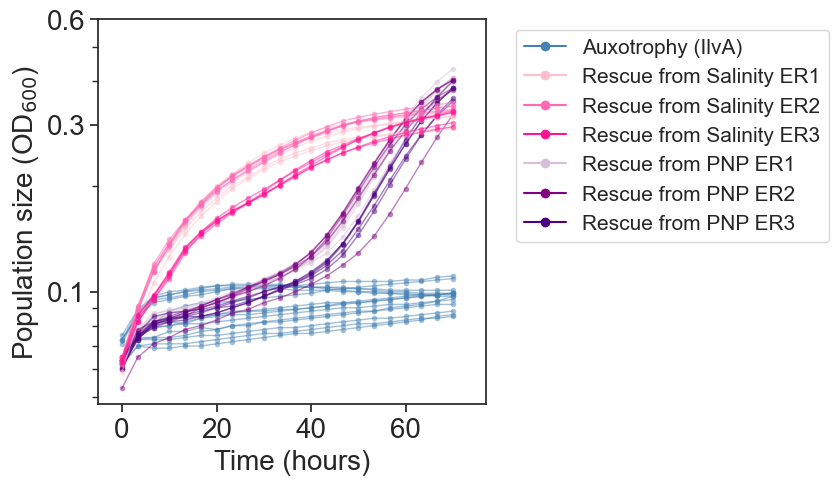

In [179]:
# Create a dictionary of colors and legend names for each strain
plot_info = {'Salinity_1': {'color': '#ffc0cb', 'label': 'Rescue from Salinity ER1'},
             'Salinity_2': {'color': '#ff69b4', 'label': 'Rescue from Salinity ER2'},
             'Salinity_3': {'color': '#ff1493', 'label': 'Rescue from Salinity ER3'},
             'Anc': {'color': '#4682B4', 'label': 'Auxotrophy (IlvA)'},
             'control': {'color': 'gray', 'label': 'control'},
             'PNP_1': {'color': 'thistle', 'label': 'Rescue from PNP ER1'},
             'PNP_2': {'color': 'purple', 'label': 'Rescue from PNP ER2'},
             'PNP_3': {'color': 'indigo', 'label': 'Rescue from PNP ER3'}}

# Filter out rows with strain 'anc_bad' from df_p1
df_p1 = df_p1[df_p1['Strain'] != 'anc_bad']

# Map colors and legend labels to each strain
df_p1['Colors'] = df_p1['Strain'].map(lambda x: plot_info[x]['color'])
df_p1['Labels'] = df_p1['Strain'].map(lambda x: plot_info[x]['label'])

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))

# Initialize lists to store legend labels and colors
legend_labels = []
legend_colors = []

# Group the data by strain
strain_grouped = df_p1.groupby('Strain')

# Iterate over each strain and plot the growth curves with error bars
for strain, strain_group in strain_grouped:
    # Skip the strains that need to be removed
    if strain in ["control"]:
        continue

    well_list = strain_group['Well'].tolist()

    # Get the color for the strain
    color = strain_group['Colors'].iloc[0]

    # Plot the growth curves for each replicate
    for well in well_list:
        od_values = od_P1[well]
        time_values = od_P1['Time']
        mean_values = od_values.groupby(time_values).mean()
        std_values = od_values.groupby(time_values).std()

        # Exclude time points with NaN values
        valid_mean_values = mean_values.dropna()
        valid_std_values = std_values.dropna()
        valid_time_values = valid_mean_values.index

        # Plot the growth curve with error bars
        if valid_std_values.empty:
            sns.lineplot(x=valid_time_values[::20], y=valid_mean_values[::20], ax=ax, label=None, marker='o', markersize=4, linewidth=1, markeredgewidth=0, alpha=0.5, color=color)
        else:
            # Calculate the upper error values (mean + std)
            upper_error = valid_mean_values + valid_std_values

            # Plot the growth curve with error bars
            ax.errorbar(valid_time_values[::20], valid_mean_values[::20], yerr=valid_std_values[::20], uplims=True, capsize=2, linestyle='-', marker='o', markersize=4, label=None, color=color)

    # Store the legend label and color for the strain if it hasn't been stored already
    if strain not in legend_labels:
        legend_labels.append(strain)
        legend_colors.append(color)

# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

# Set the x-axis limit from 0 to 72 hours
ax.set_xlim(-5, 77)
# Set the y-axis ticks
ax.set_yticks([0.1, 0.3, 0.6])

# Set the x-axis and y-axis labels
ax.set_xlabel('Time (hours)', fontsize=20)
ax.set_ylabel('Population size (OD$_{600}$)', fontsize=20)  # Subíndice 600 en el eje x

# Filter out unique labels and colors, excluding 'control'
unique_labels = df_p1[df_p1['Strain'] != 'control']['Labels'].unique()
unique_colors = df_p1[df_p1['Strain'] != 'control']['Colors'].unique()

# Add a legend for all strains, excluding 'control'
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color) for label, color in zip(unique_labels, unique_colors)]
ax.legend(handles=legend_elements, fontsize=15, loc='best', bbox_to_anchor=(1.05, 1))

# Increase the font size of tick labels on both axes
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Show the plot
plt.show()


### Salinity isolates for cross-resistance experiment

In [180]:
# Step 1: Filter the DataFrame for transfer 20 and the strain 'M+I'
filtered_df = df_salinity[(df_salinity['Time point'] == "20") & (df_salinity['Strain'] == 'M+I') & (df_salinity['OD600'] > 0.05)]

# Step 2: Sort the filtered DataFrame by OD600 values in ascending order
sorted_df = filtered_df.sort_values('OD600')

# Step 3: Select the rows with the lowest OD600 values
lowest_cultures = sorted_df.head(3)

# Step 4: Select the rows with the highest OD600 values
highest_cultures = sorted_df.tail(3)

# Step 5: Concatenate the selected rows to create the new database
new_database = pd.concat([lowest_cultures, highest_cultures])

new_database


,row,variable,value,well,Specie,Strain,Time point,Culture condition,Interaction,Salinity,PNP,Culture,OD600,Stress
27,D,4,0.140,D 4,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.09675,Salinity
48,A,7,0.166,A 7,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.12275,Salinity
41,B,6,0.193,B 6,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.14975,Salinity
86,G,11,0.574,G 11,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.53075,Salinity
9,B,2,0.643,B 2,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.59975,Salinity
13,F,2,0.704,F 2,E. coli,M+I,20,co-culture,Obligate mutualism,3,0,culture,0.66075,Salinity


### PNP isolates for cross-resistance experiment

In [181]:
# Step 1: Filter the DataFrame for transfer 20 and the strain 'M+I'
filtered_df = df_PNP[(df_PNP['Time point'] == "20") & (df_PNP['Strain'] == 'M+I') & (df_PNP['OD600'] > 0.05)]

# Step 2: Sort the filtered DataFrame by OD600 values in ascending order
sorted_df = filtered_df.sort_values('OD600')

# Step 3: Select the rows with the lowest OD600 values
lowest_cultures = sorted_df.head(3)

# Step 4: Select the rows with the highest OD600 values
highest_cultures = sorted_df.tail(3)

# Step 5: Concatenate the selected rows to create the new database
new_database = pd.concat([lowest_cultures, highest_cultures])

new_database


,row,variable,value,well,Specie,Strain,Time point,Culture condition,Interaction,Salinity,PNP,Culture,OD600,Stress
93,F,12,0.091,F 12,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.050458,PNP
36,E,5,0.092,E 5,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.051458,PNP
73,B,10,0.094,B 10,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.053458,PNP
41,B,6,0.340,B 6,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.299458,PNP
6,G,1,0.354,G 1,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.313458,PNP
20,E,3,0.380,E 3,E. coli,M+I,20,co-culture,Obligate mutualism,0,0.4,culture,0.339458,PNP


## Figure 4: Stress-response experiment



The **average growth rate** measures the rate of change in optical density (OD) per unit time up to the midpoint between the initial and final measurements in the growth curve (`gc`). It is expressed in hours^{-1} and is calculated using the formula:

$$
\text{Growth rate (h}^{-1}\text{)} = \frac{1}{t_{\text{thr}}} \log \left( \frac{\text{threshold}}{\text{OD}_{\text{i}}} \right)
$$

Where:
- $t_{\text{mid}}$ is the time corresponding to the midpoint threshold.
- $\text{midpoint threshold}$ is a value determined to be halfway between the initial and final OD measurements, typically calculated as a fraction (e.g., 1.5) of the initial OD ($\text{OD}_{\text{initial}}$).

### Yield

The **yield** represents the net change in OD from the beginning to the end of the growth curve. It is calculated as the logarithm base 2 of the ratio of the final OD ($\text{OD}_{\text{final}}$) to the initial OD ($\text{OD}_{\text{initial}}$):

$$
\text{Yield} = \log_2 \left( \frac{\text{OD}_{\text{f}}}{\text{OD}_{\text{i}}} \right)
$$

The yield provides insights into the overall growth performance over the course of the experiment.



In [182]:
def get_growth_rate_and_yield(gc):
    '''
    Get the avergae growth rate to the mid point between the initial and final od in a growth curve (gc)
    and the yield = od_final-od_initial
    '''
    gc = gc.dropna()
    gc_i = gc.iloc[0]
    gc_f = gc.iloc[-1]
    y = log2(gc_f/gc_i)

    # th = gc_i + (gc_f-gc_i)/2
    th = 1.5*gc_i
    if th>gc_f:
        return 0, y

    t_th = od_ss_2['Time'][(gc<th).idxmin()]

    r_th = 1/t_th*log(th/gc_i)
    return r_th, y

#### Response to salinity

In [183]:
## load OD data for salinity

def normalize (row, blank_wells):
    blank=row[blank_wells].mean()
    row=(row-blank).clip(lower=1e-4)#.round(3)
    return row


def parse_od_1(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=35, nrows=579)
    od.drop(['T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

def parse_od_2(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=28, nrows=579)
    od.drop(['Unnamed: 0','T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

blank_wells = ['E2','E3','F2','F3',]


dfile="Data/Stress_response/salinity/P1.xlsx"
od_s_1 = parse_od_1(dfile, blank_wells)

dfile="Data/Stress_response/salinity/P2.xlsx"
od_s_2 = parse_od_2(dfile, blank_wells)

In [184]:
## load metadata data for salinity
Location_key = "Data/Stress_response/salinity/Key_salinity_GC_1.xlsx"

# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(Location_key, sheet_name='Key_P1')
tmp['plate'] = 'P1'

tmp2 = pd.read_excel(Location_key, sheet_name='Key_P2')
tmp2['plate'] = 'P2'

metadata_salinity = pd.concat((tmp, tmp2), ignore_index=True)

def map_strain_history(s):
    if s in ['WT', 'I', 'M', 'I+M']:
        h = 'salinity'
    else:
        h = None
    return h

metadata_salinity['history'] = metadata_salinity.Strain.map(map_strain_history)
metadata_salinity

,Well name,Strain,Amino acids,Salinity,plate,history
0,A1,WT,0,0,P1,salinity
1,A2,I,0,0,P1,salinity
2,A3,M,0,0,P1,salinity
3,A4,I+M,0,0,P1,salinity
4,A5,WT,10,0,P1,salinity
...,...,...,...,...,...,...
187,H8,I+M,10,4,P2,salinity
188,H9,WT,100,4,P2,salinity
189,H10,I,100,4,P2,salinity
190,H11,M,100,4,P2,salinity


In [185]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/ignaciojosemelerojimenez/Library/Python/3.11/lib/python/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['product', 'legend', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [186]:
## smooth curves
w = 8 #size of smoothing window
od_ss_1 = od_s_1.copy()
od_ss_1 = od_s_1.rolling(window=w, center=True, axis=0).mean()
od_ss_1['Time'] = od_s_1['Time']

od_ss_2 = od_s_2.copy()
od_ss_2 = od_s_2.rolling(window=w, center=True, axis=0).mean()
od_ss_2['Time'] = od_s_2['Time']

ods = {'P1': od_ss_1, 'P2':od_ss_2}


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/93966752.py:4: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ss_1 = od_s_1.rolling(window=w, center=True, axis=0).mean()
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/93966752.py:8: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ss_2 = od_s_2.rolling(window=w, center=True, axis=0).mean()


In [187]:
metadata_salinity['r'] = 0
metadata_salinity['yield'] = 0
for i, v in metadata_salinity.iterrows():
    gc = ods[v['plate']][v['Well name']]
    r,y = get_growth_rate_and_yield(gc)
    metadata_salinity.loc[i, 'r'] = r
    metadata_salinity.loc[i, 'yield'] = y

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2957902821.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07155266613673489' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_salinity.loc[i, 'r'] = r
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2957902821.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4674329341686727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_salinity.loc[i, 'yield'] = y


Values of r and yield for salinity equal to 3

In [188]:
# Assuming you already have 'metadata_salinity' loaded
# Filter the data to include only strains 'WT' and 'I+M' and no amino acids
filtered_data_s = metadata_salinity[(metadata_salinity['Strain'].isin(['WT', 'I+M'])) & (metadata_salinity['Amino acids'] == 0)]

# Further filter the data for strain 'I+M' with salinity 3
im_salt_3_data = filtered_data_s[(filtered_data_s['Strain'] == 'I+M') & (filtered_data_s['Salinity'] == 3)]

# Convert the 'r' and 'yield' columns to numeric, forcing errors to NaN
im_salt_3_data['r'] = pd.to_numeric(im_salt_3_data['r'], errors='coerce')
im_salt_3_data['yield'] = pd.to_numeric(im_salt_3_data['yield'], errors='coerce')

# Drop rows with NaN values in the 'r' and 'yield' columns
im_salt_3_data = im_salt_3_data.dropna(subset=['r', 'yield'])

# Calculate the mean and standard error of the mean (SEM) for the 'r' column
mean_r = im_salt_3_data['r'].mean()
sem_r = im_salt_3_data['r'].sem()

# Calculate the mean and standard error of the mean (SEM) for the 'yield' column
mean_yield = im_salt_3_data['yield'].mean()
sem_yield = im_salt_3_data['yield'].sem()

print(f"Mean r for strain 'I+M' with salinity 3: {mean_r}")
print(f"Standard error of the mean (SEM) for r: {sem_r}")
print(f"Mean yield for strain 'I+M' with salinity 3: {mean_yield}")
print(f"Standard error of the mean (SEM) for yield: {sem_yield}")


Mean r for strain 'I+M' with salinity 3: 0.02430147485074507
Standard error of the mean (SEM) for r: 0.002675102159323856
Mean yield for strain 'I+M' with salinity 3: 1.624198476781271
Standard error of the mean (SEM) for yield: 0.041899329920463385


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1794855478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_salt_3_data['r'] = pd.to_numeric(im_salt_3_data['r'], errors='coerce')
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1794855478.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_salt_3_data['yield'] = pd.to_numeric(im_salt_3_data['yield'], errors='coerce')


### Growth curves for salinity response

In [189]:
mdata1 = pd.read_excel(Location_key, sheet_name='Key_P1',index_col=0).squeeze()
mdata2 = pd.read_excel(Location_key, sheet_name='Key_P2', index_col=0).squeeze()

bg = 0

od_s_1_GC = []
for i, r in od_s_1.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata1.loc[i].values]
        od_s_1_GC.append(tmp)

od_s_1_GC = pd.DataFrame(od_s_1_GC, columns=['well', 'time', 'OD'] + list(mdata1.columns))


od_s_2_GC = []
for i, r in od_s_2.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata2.loc[i].values]
        od_s_2_GC.append(tmp)

od_s_2_GC = pd.DataFrame(od_s_2_GC, columns=['well', 'time', 'OD'] + list(mdata2.columns))

In [190]:
Salinity_all = pd.concat((od_s_1_GC, od_s_2_GC,))
Salinity_all_df = Salinity_all.query("`Amino acids` == 0 and (Strain == 'I+M' or Strain == 'WT')")

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2162667548.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2162667548.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2162667548.py:4: FutureWarning: The default of obse

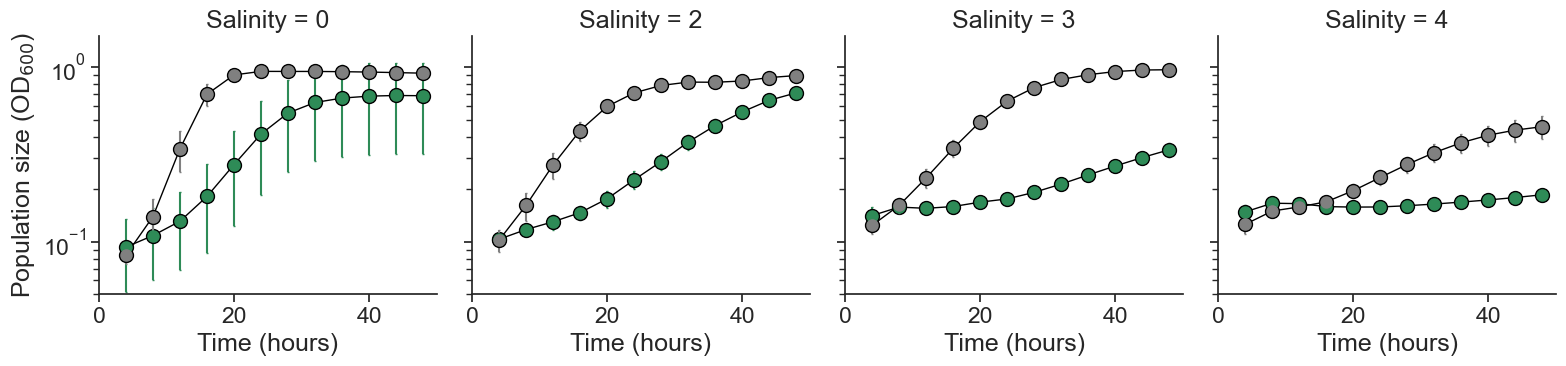

In [191]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    # Group the data by intervals and calculate the mean and standard deviation
    sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines for the means
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, color=kwargs['color'], alpha=1,  markersize=8)
    
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=10, color='black', linewidth=1)  # Add connecting line for the means
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit

# Crear el diccionario de colores
palette = {'WT': 'gray', 'I+M': '#2E8B57'}

# Crear el FacetGrid con un tamaño más grande y el palette especificado
g = sns.FacetGrid(Salinity_all_df, hue='Strain', col='Salinity', margin_titles=True, height=4, aspect=1, palette=palette)


# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size (OD$_{600}$)")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0.05, top=1.5)  # Set the y-axis limits

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()

### Growth curves for PNP response

In [192]:
def parse_od_1(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=35, nrows=579,sheet_name='P1' )
    od.drop(['T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

def parse_od_2(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=35, nrows=579,sheet_name='P2', )
    od.drop(['T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

blank_wells = ['E1','F1','G1','H1']


dfile="Data/Stress_response/PNP/PNP.xlsx"
od_PNP_1 = parse_od_1(dfile, blank_wells)

dfile="Data/Stress_response/PNP/PNP.xlsx"
od_PNP_2 = parse_od_2(dfile, blank_wells)

In [193]:
## load metadata data for PNP
Location_key = "Data/Stress_response/PNP/PNP_Key.xlsx"

# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(Location_key, sheet_name='Key_P1')
tmp['plate'] = 'P1'

tmp2 = pd.read_excel(Location_key, sheet_name='Key_P2')
tmp2['plate'] = 'P2'

metadata_PNP = pd.concat((tmp, tmp2), ignore_index=True)

def map_strain_history(s):
    if s in ['WT', 'I', 'M', 'M+I', 'L', 'M+L']:
        h = 'PNP'
    else:
        h = None
    return h

metadata_PNP['history'] = metadata_PNP.Strain.map(map_strain_history)

In [194]:
## smooth curves
w = 8 #size of smoothing window
od_PNP_11 = od_PNP_1.copy()
od_PNP_11 = od_PNP_1.rolling(window=w, center=True, axis=0).mean()
od_PNP_11['Time'] = od_PNP_1['Time']

od_PNP_22 = od_PNP_2.copy()
od_PNP_22 = od_PNP_2.rolling(window=w, center=True, axis=0).mean()
od_PNP_22['Time'] = od_PNP_2['Time']

ods_PNP = {'P1': od_PNP_11, 'P2':od_PNP_22}


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1737500160.py:4: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_PNP_11 = od_PNP_1.rolling(window=w, center=True, axis=0).mean()
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1737500160.py:8: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_PNP_22 = od_PNP_2.rolling(window=w, center=True, axis=0).mean()


In [195]:
metadata_PNP['r'] = 0
metadata_PNP['yield'] = 0
for i, v in metadata_PNP.iterrows():
    gc = ods_PNP[v['plate']][v['Well name']]
    r,y = get_growth_rate_and_yield(gc)
    metadata_PNP.loc[i, 'r'] = r
    metadata_PNP.loc[i, 'yield'] = y

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2667251847.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01225587228538532' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_PNP.loc[i, 'r'] = r
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2667251847.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8468391801815509' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_PNP.loc[i, 'yield'] = y


In [196]:
Location_key = "Data/Stress_response/PNP/PNP_Key.xlsx"

mdata1 = pd.read_excel(Location_key, sheet_name='Key_P1',index_col=0).squeeze()
mdata2 = pd.read_excel(Location_key, sheet_name='Key_P2', index_col=0).squeeze()

bg = 0

od_PNP_1_GC = []
for i, r in od_PNP_1.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata1.loc[i].values]
        od_PNP_1_GC.append(tmp)

od_PNP_1_GC = pd.DataFrame(od_PNP_1_GC, columns=['well', 'time', 'OD'] + list(mdata1.columns))


od_PNP_2_GC = []
for i, r in od_PNP_2.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata2.loc[i].values]
        od_PNP_2_GC.append(tmp)

od_PNP_2_GC = pd.DataFrame(od_PNP_2_GC, columns=['well', 'time', 'OD'] + list(mdata2.columns))

In [197]:
PNP_all = pd.concat((od_PNP_1_GC, od_PNP_2_GC,))
PNP_all_df = PNP_all.query("`AA` == 0 and (Strain == 'M+I' or Strain == 'WT')")

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2260361890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2260361890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2260361890.py:4: FutureWarning: The default of obse

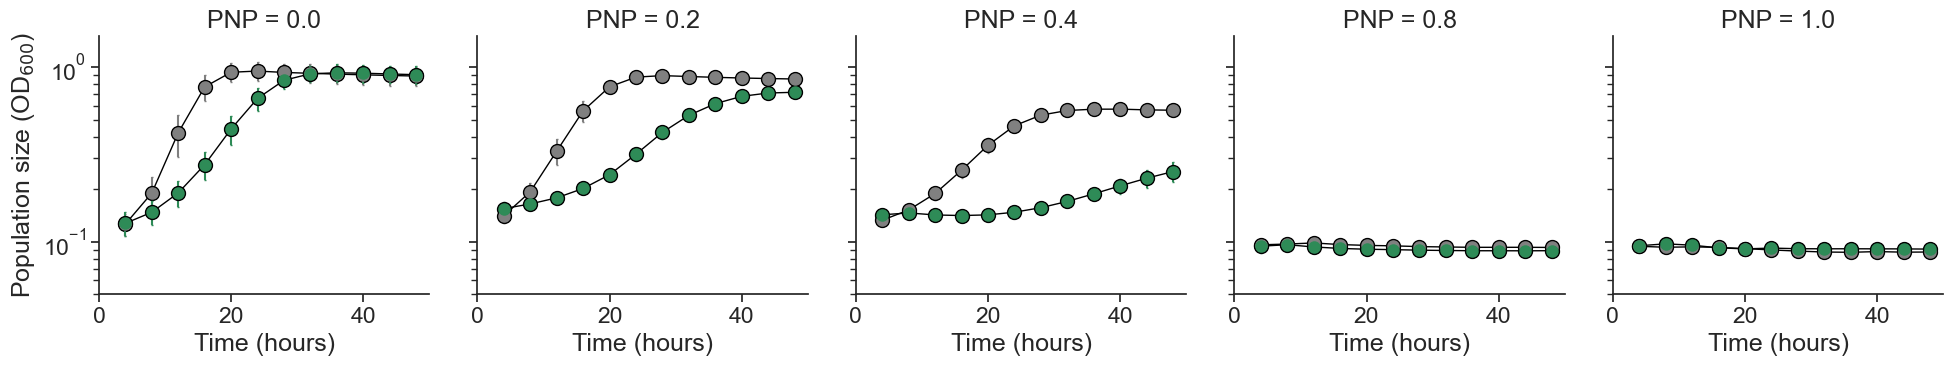

In [198]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    # Group the data by intervals and calculate the mean and standard deviation
    sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines for the means
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, color=kwargs['color'], alpha=1, markersize=8)
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=10, color='black', linewidth=1)  # Add connecting line for the means
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit

# Crear el diccionario de colores
palette = {'WT': 'gray', 'M+I': '#2E8B57'}

# Crear el FacetGrid con un tamaño más grande y el palette especificado
g = sns.FacetGrid(PNP_all_df, hue='Strain', col='PNP', margin_titles=True, height=4, aspect=1, palette=palette)


# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size (OD$_{600}$)")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0.05, top=1.5)  # Set the y-axis limits

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()

### Growth curves for H2O2 response

In [199]:
def parse_od_1(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=29, nrows=579,sheet_name='P1' )
    od.drop(['Unnamed: 0',	'T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

def parse_od_2(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=29, nrows=579,sheet_name='P2', )
    od.drop(['Unnamed: 0',	'T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

blank_wells = ['E1','F1','G1','H1']


dfile="Data/Stress_response/H2O2/H2O2.xlsx"
od_H2O2_1 = parse_od_1(dfile, blank_wells)

dfile="Data/Stress_response/H2O2/H2O2.xlsx"
od_H2O2_2 = parse_od_2(dfile, blank_wells)

In [200]:
## load metadata data for PNP
Location_key = "Data/Stress_response/H2O2/H2O2_Key.xlsx"

# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(Location_key, sheet_name='Key_P1')
tmp['plate'] = 'P1'

tmp2 = pd.read_excel(Location_key, sheet_name='Key_P2')
tmp2['plate'] = 'P2'

metadata_H2O2 = pd.concat((tmp, tmp2), ignore_index=True)

def map_strain_history(s):
    if s in ['WT', 'I', 'M', 'M+I', 'L', 'M+L']:
        h = 'H2O2'
    else:
        h = None
    return h

metadata_H2O2['history'] = metadata_H2O2.Strain.map(map_strain_history)


In [201]:
## smooth curves
w = 8 #size of smoothing window
od_H2O2_11 = od_H2O2_1.copy()
od_H2O2_11 = od_H2O2_1.rolling(window=w, center=True, axis=0).mean()
od_H2O2_11['Time'] = od_H2O2_1['Time']

od_H2O2_22 = od_H2O2_2.copy()
od_H2O2_22 = od_H2O2_2.rolling(window=w, center=True, axis=0).mean()
od_H2O2_22['Time'] = od_H2O2_2['Time']

ods_H2O2 = {'P1': od_H2O2_11, 'P2':od_H2O2_22}


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2400810945.py:4: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_H2O2_11 = od_H2O2_1.rolling(window=w, center=True, axis=0).mean()
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2400810945.py:8: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_H2O2_22 = od_H2O2_2.rolling(window=w, center=True, axis=0).mean()


In [202]:
metadata_H2O2['r'] = 0
metadata_H2O2['yield'] = 0
for i, v in metadata_H2O2.iterrows():
    gc = ods_H2O2[v['plate']][v['Well name']]
    r,y = get_growth_rate_and_yield(gc)
    metadata_H2O2.loc[i, 'r'] = r
    metadata_H2O2.loc[i, 'yield'] = y

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3319223567.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.41995298969296047' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_H2O2.loc[i, 'yield'] = y
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3319223567.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07262061637758169' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_H2O2.loc[i, 'r'] = r


In [203]:
Location_key = "Data/Stress_response/H2O2/H2O2_Key.xlsx"

mdata1 = pd.read_excel(Location_key, sheet_name='Key_P1',index_col=0).squeeze()
mdata2 = pd.read_excel(Location_key, sheet_name='Key_P2', index_col=0).squeeze()

bg = 0

od_H2O2_1_GC = []
for i, r in od_H2O2_1.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata1.loc[i].values]
        od_H2O2_1_GC.append(tmp)

od_H2O2_1_GC = pd.DataFrame(od_H2O2_1_GC, columns=['well', 'time', 'OD'] + list(mdata1.columns))


od_H2O2_2_GC = []
for i, r in od_H2O2_2.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata2.loc[i].values]
        od_H2O2_2_GC.append(tmp)

od_H2O2_2_GC = pd.DataFrame(od_H2O2_2_GC, columns=['well', 'time', 'OD'] + list(mdata2.columns))

In [204]:
H2O2_all = pd.concat((od_H2O2_1_GC, od_H2O2_2_GC,))
H2O2_all_df = H2O2_all.query("`AA` == 0 and (Strain == 'M+I' or Strain == 'WT')")

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3256731304.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3256731304.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3256731304.py:4: FutureWarning: The default of obse

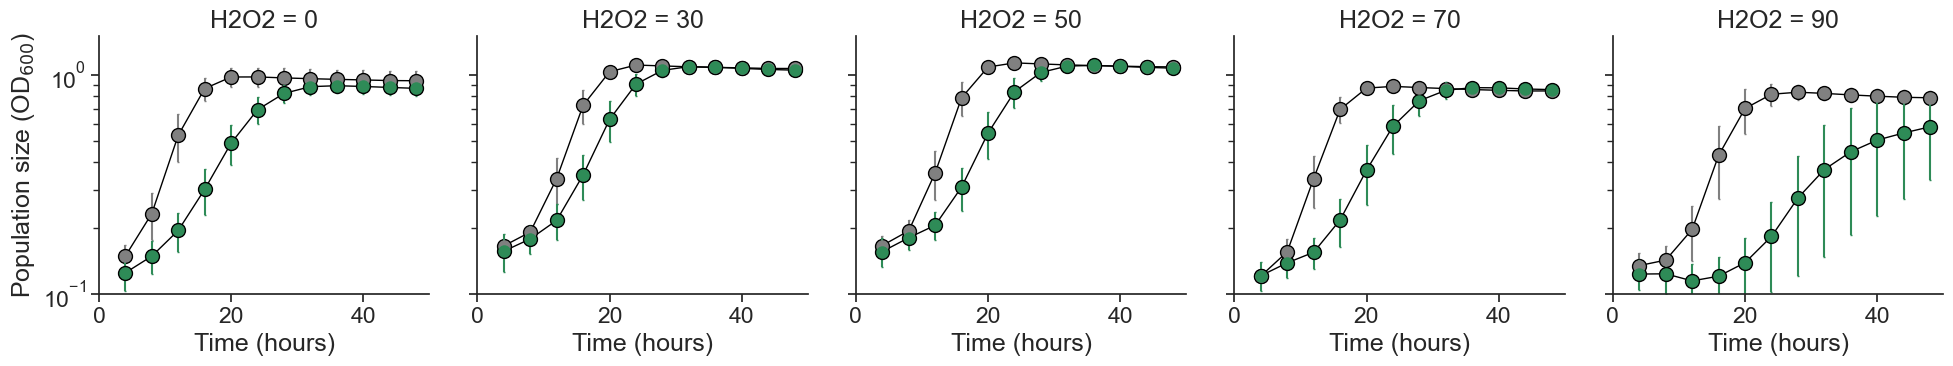

In [205]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    # Group the data by intervals and calculate the mean and standard deviation
    sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines for the means
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, color=kwargs['color'], alpha=1, markersize=8)
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=10, color='black', linewidth=1)  # Add connecting line for the means
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit

# Crear el diccionario de colores
palette = {'WT': 'gray', 'M+I': '#2E8B57'}

# Crear el FacetGrid con un tamaño más grande y el palette especificado
g = sns.FacetGrid(H2O2_all_df, hue='Strain', col='H2O2', margin_titles=True, height=4, aspect=1, palette=palette)


# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size (OD$_{600}$)")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0.1, top=1.5)  # Set the y-axis limits

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()

### Growth curves for Spectinomycin response

In [206]:
def parse_od_1(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=28, nrows=579,sheet_name='P1' )
    od.drop(['Unnamed: 0',	'T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

def parse_od_2(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=28, nrows=579,sheet_name='P2', )
    od.drop(['Unnamed: 0',	'T° 600', 'Time'], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

blank_wells = ['E1','F1','G1','H1']


dfile="Data/Stress_response/Spectinomycin/Spectinomycin.xlsx"
od_SP_1 = parse_od_1(dfile, blank_wells)

dfile="Data/Stress_response/Spectinomycin/Spectinomycin.xlsx"
od_SP_2 = parse_od_2(dfile, blank_wells)

In [207]:
## load metadata data for PNP
Location_key = "Data/Stress_response/Spectinomycin/Key_Spec.xlsx"

# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(Location_key, sheet_name='Key_P1')
tmp['plate'] = 'P1'


metadata_SP = pd.concat((tmp, ), ignore_index=True)

def map_strain_history(s):
    if s in ['WT', 'I', 'M', 'M+I', 'L', 'M+L']:
        h = 'SP'
    else:
        h = None
    return h

metadata_SP['history'] = metadata_SP.Strain.map(map_strain_history)

In [208]:
## smooth curves
w = 8 #size of smoothing window
od_SP_11 = od_SP_1.copy()
od_SP_11 = od_SP_1.rolling(window=w, center=True, axis=0).mean()
od_SP_11['Time'] = od_SP_1['Time']

ods_SP = {'P1': od_SP_11,}


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/814793744.py:4: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_SP_11 = od_SP_1.rolling(window=w, center=True, axis=0).mean()


In [209]:
metadata_SP['r'] = 0
metadata_SP['yield'] = 0
for i, v in metadata_SP.iterrows():
    gc = ods_SP[v['plate']][v['Well name']]
    r,y = get_growth_rate_and_yield(gc)
    metadata_SP.loc[i, 'r'] = r
    metadata_SP.loc[i, 'yield'] = y

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/516110932.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1445735517795282' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_SP.loc[i, 'yield'] = y
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/516110932.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07155266613673489' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata_SP.loc[i, 'r'] = r


In [210]:
Location_key = "Data/Stress_response/Spectinomycin/Key_Spec.xlsx"

mdata1 = pd.read_excel(Location_key, sheet_name='Key_P1',index_col=0).squeeze()

bg = 0

od_SP_1_GC = []
for i, r in od_SP_1.iterrows():
    time = r['Time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata1.loc[i].values]
        od_SP_1_GC.append(tmp)

od_SP_1_GC = pd.DataFrame(od_SP_1_GC, columns=['well', 'time', 'OD'] + list(mdata1.columns))

od_SP__all_df = od_SP_1_GC.query("`AA` == 0 and (Strain == 'M+I' or Strain == 'WT')")

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/343213681.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/343213681.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/343213681.py:4: FutureWarning: The default of observe

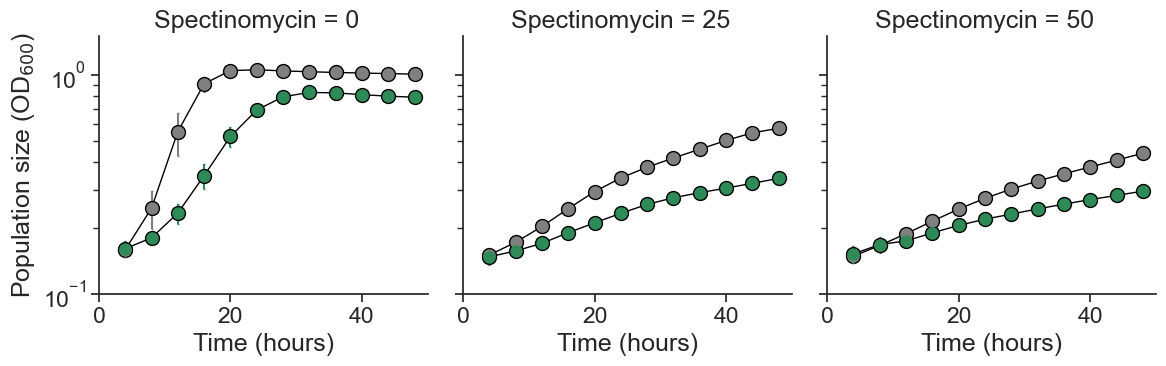

In [211]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    # Group the data by intervals and calculate the mean and standard deviation
    sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines for the means
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, color=kwargs['color'], alpha=1, markersize=8)
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=10, color='black', linewidth=1)  # Add connecting line for the means
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit

# Crear el diccionario de colores
palette = {'WT': 'gray', 'M+I': '#2E8B57'}

# Crear el FacetGrid con un tamaño más grande y el palette especificado
g = sns.FacetGrid(od_SP__all_df, hue='Strain', col='Specto', margin_titles=True, height=4, aspect=1, palette=palette)


# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size (OD$_{600}$)")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0.1, top=1.5)  # Set the y-axis limits

# Adjust layout to make space for the legend
plt.tight_layout()

g.set_titles(col_template="Spectinomycin = {col_name}  ")

# Show the plot
plt.show()

### Figure 4.

The obligate mutualism is more susceptible to environmental stress than the prototroph. 

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/4130888516.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False)  # Eliminar la leyenda del pointplot
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/4130888516.py:28: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False)  # Eliminar la leyenda del pointplot
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/4130888516.py:28: FutureWarning: 


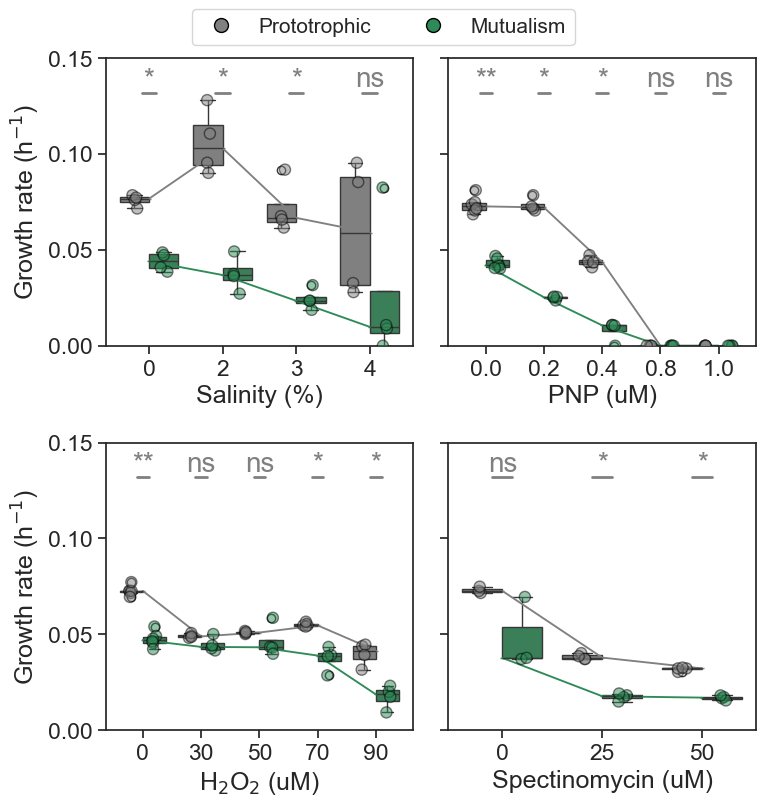

In [212]:
# Create a figure and axis for subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Define the filtered data list for WT and M+I/I+M strains
filtered_data_list = [
    (metadata_salinity[(metadata_salinity['Strain'].isin(['WT', 'I+M'])) & (metadata_salinity['Amino acids'] == 0)], 'Salinity', 'r', 'Salinity (%)', [i/100 for i in range(0, 16, 5)]),
    (metadata_PNP[(metadata_PNP['Strain'].isin(['WT', 'M+I'])) & (metadata_PNP['AA'] == 0)], 'PNP', 'r', 'PNP (uM)', [i/100 for i in range(0, 16, 5)]),
    (metadata_H2O2[(metadata_H2O2['Strain'].isin(['WT', 'M+I'])) & (metadata_H2O2['AA'] == 0)], 'H2O2', 'r', 'H2O2 (uM)', [i/100 for i in range(0, 16, 5)]),
    (metadata_SP[(metadata_SP['Strain'].isin(['WT', 'M+I'])) & (metadata_SP['AA'] == 0)], 'Specto', 'r', 'Spectinomycin (uM)', [i/100 for i in range(0, 16, 5)])
]

# Define custom colors for WT (gray) and M+I (green), including 'Mutualism' instead of 'Mutualism (M+I)'
custom_palette = {'WT': 'gray', 'I+M': '#2E8B57', 'M+I': '#2E8B57', 'Mutualism': '#2E8B57'}

# Create a list to store statistical results
results = []

# Loop through each subplot data and plot
for i, (filtered_data, x_col, y_col, x_label, y_ticks) in enumerate(filtered_data_list):
    row = i // 2
    col = i % 2
    
    # Plot the data
    sns.boxplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, ax=axs[row, col], showfliers=True, legend=False)
    sns.stripplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, size=8, alpha=0.5, edgecolor='black', linewidth=1, ax=axs[row, col], legend=False, dodge=True)
    
    # Add pointplot to connect medians of strains
    sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False)  # Eliminar la leyenda del pointplot
    
    axs[row, col].set_xlabel(x_label, fontsize=18)  # Aumentar el tamaño del texto del eje x
    axs[row, col].set_ylabel('Growth rate (h$^{-1}$)', fontsize=18)  # Aumentar el tamaño del texto del eje y
    
    # Ajustar el rango del eje y para los gráficos 3 y 4 (índices 2 y 3)
    if i >= 2:
        axs[row, col].set_ylim(0, 0.15)
    else:
        axs[row, col].set_ylim(0, 0.15)
    
    axs[row, col].set_yticks(y_ticks)
    
    # Perform Mann-Whitney U test (two-tailed) and annotate significance
    xtick_labels = [float(label.get_text()) for label in axs[row, col].get_xticklabels()]
    for xtick_label in xtick_labels:
        wt_data = filtered_data[(filtered_data['Strain'] == 'WT') & (filtered_data[x_col] == xtick_label)][y_col]
        mutualism_data = filtered_data[((filtered_data['Strain'] == 'I+M') | (filtered_data['Strain'] == 'M+I')) & (filtered_data[x_col] == xtick_label)][y_col]
        if not wt_data.empty and not mutualism_data.empty:
            u_statistic, p_value = mannwhitneyu(wt_data, mutualism_data, alternative='two-sided')
            significance = 'ns'
            if p_value < 0.001:
                significance = '***'
            elif p_value < 0.01:
                significance = '**'
            elif p_value < 0.05:
                significance = '*'
            
            # Add the asterisk for significance or 'ns'
            axs[row, col].annotate(significance, xy=(xtick_labels.index(xtick_label), 0.135), ha='center', fontsize=20, color='grey')
            axs[row, col].plot([xtick_labels.index(xtick_label)-0.1, xtick_labels.index(xtick_label)+0.1], [0.132, 0.132], color='grey', lw=2)  # Add horizontal line under significance
            
            # Append results to the list
            results.append({'Condition': x_col, 'Stress Level': xtick_label, 'U Statistic': u_statistic, 'P Value': p_value, 'Significance': significance})
    
    # Set x-axis tick labels with subindices for H2O2
    if x_col == 'H2O2':
        axs[row, col].set_xlabel('H$_2$O$_2$ (uM)', fontsize=18)  # Aumentar el tamaño del texto del eje x

# Custom legend inside the plot with correct colors and black borders
legend_labels = ['Prototrophic', 'Mutualism']  # Cambiar 'Mutualism (M+I)' por 'Mutualism'
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette.get(label, 'gray'), markeredgewidth=1, markeredgecolor='black', markersize=10) for label in legend_labels]
fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=2, fontsize=15)  # Ajustar posición y tamaño de la leyenda

# Ajustar layout para dejar espacio para la leyenda
plt.subplots_adjust(top=0.85)  # Ajustar manualmente si es necesario

plt.tight_layout()
plt.show()


In [213]:
# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Print the results in a nice table format
print("Statistical Results:")
print(results_df.to_string(index=False))

Statistical Results:
Condition  Stress Level  U Statistic  P Value Significance
 Salinity           0.0         16.0 0.028571            *
 Salinity           2.0         16.0 0.028571            *
 Salinity           3.0         16.0 0.028571            *
 Salinity           4.0         14.0 0.114286           ns
      PNP           0.0         36.0 0.002165           **
      PNP           0.2         16.0 0.028571            *
      PNP           0.4         16.0 0.028571            *
      PNP           0.8          8.0 1.000000           ns
      PNP           1.0          8.0 1.000000           ns
     H2O2           0.0         36.0 0.004998           **
     H2O2          30.0         13.0 0.200000           ns
     H2O2          50.0         12.0 0.342857           ns
     H2O2          70.0         16.0 0.028571            *
     H2O2          90.0         16.0 0.028571            *
   Specto           0.0          9.0 0.100000           ns
   Specto          25.0         16.

### Figure S4.

The obligate mutualism is more susceptible to environmental stress than the prototroph. 

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1834577200.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False, alpha=0.8)  # Lineplot for median
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1834577200.py:28: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False, alpha=0.8)  # Lineplot for median
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1834577200.py:28: FutureWarning: 

The `

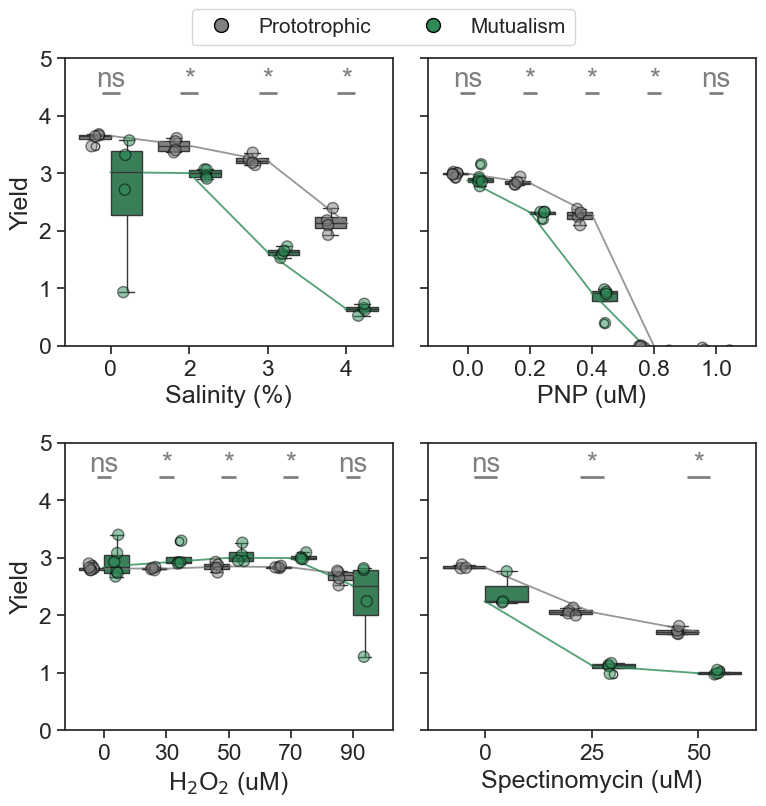

In [214]:
# Create a figure and axis for subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Define the filtered data list for WT and M+I/I+M strains
filtered_data_list = [
    (metadata_salinity[(metadata_salinity['Strain'].isin(['WT', 'I+M'])) & (metadata_salinity['Amino acids'] == 0)], 'Salinity', 'yield', 'Salinity (%)', [i/100 for i in range(0, 16, 5)]),
    (metadata_PNP[(metadata_PNP['Strain'].isin(['WT', 'M+I'])) & (metadata_PNP['AA'] == 0)], 'PNP', 'yield', 'PNP (uM)', [i/100 for i in range(0, 16, 5)]),
    (metadata_H2O2[(metadata_H2O2['Strain'].isin(['WT', 'M+I'])) & (metadata_H2O2['AA'] == 0)], 'H2O2', 'yield', 'H2O2 (uM)', [i/100 for i in range(0, 16, 5)]),
    (metadata_SP[(metadata_SP['Strain'].isin(['WT', 'M+I'])) & (metadata_SP['AA'] == 0)], 'Specto', 'yield', 'Spectinomycin (uM)', [i/100 for i in range(0, 16, 5)])
]

# Define custom colors for WT (gray) and M+I (green), including 'Mutualism' with alpha=0.8
custom_palette = {'WT': 'gray', 'I+M': '#2E8B57', 'M+I': '#2E8B57', 'Mutualism': '#2E8B57'}

# Create a list to store statistical results
results = []

# Loop through each subplot data and plot
for i, (filtered_data, x_col, y_col, x_label, y_ticks) in enumerate(filtered_data_list):
    row = i // 2
    col = i % 2
    
    # Plot the data
    sns.boxplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, ax=axs[row, col], showfliers=True, legend=False)
    sns.stripplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, size=8, alpha=0.5, edgecolor='black', linewidth=1, ax=axs[row, col], legend=False, dodge=True)
    
    # Add pointplot to connect medians of strains
    sns.pointplot(data=filtered_data, x=x_col, y=y_col, hue='Strain', palette=custom_palette, markers='_', scale=0.5, ci=None, estimator=np.median, ax=axs[row, col], legend=False, alpha=0.8)  # Lineplot for median
    
    axs[row, col].set_xlabel(x_label)
    axs[row, col].set_ylabel('Yield')
    axs[row, col].set_ylim(0, 5)
    #axs[row, col].set_yticks(y_ticks)
    
    # Perform Mann-Whitney U test (two-tailed) and annotate significance
    xtick_labels = [float(label.get_text()) for label in axs[row, col].get_xticklabels()]
    for xtick_label in xtick_labels:
        wt_data = filtered_data[(filtered_data['Strain'] == 'WT') & (filtered_data[x_col] == xtick_label)][y_col]
        mutualism_data = filtered_data[((filtered_data['Strain'] == 'I+M') | (filtered_data['Strain'] == 'M+I')) & (filtered_data[x_col] == xtick_label)][y_col]
        if not wt_data.empty and not mutualism_data.empty:
            u_statistic, p_value = mannwhitneyu(wt_data, mutualism_data, alternative='two-sided')
            significance = 'ns'
            if p_value < 0.001:
                significance = '***'
            elif p_value < 0.01:
                significance = '**'
            elif p_value < 0.05:
                significance = '*'
            
            # Add the asterisk for significance or 'ns'
            axs[row, col].annotate(significance, xy=(xtick_labels.index(xtick_label), 4.5), ha='center', fontsize=20, color='grey')
            axs[row, col].plot([xtick_labels.index(xtick_label)-0.1, xtick_labels.index(xtick_label)+0.1], [4.4, 4.4], color='grey', lw=2)  # Add horizontal line under significance
            
            # Append results to the list
            results.append({'Condition': x_col, 'Stress Level': xtick_label, 'U Statistic': u_statistic, 'P Value': p_value, 'Significance': significance})
    
    # Set x-axis tick labels with subindices for H2O2
    if x_col == 'H2O2':
        axs[row, col].set_xlabel('H$_2$O$_2$ (uM)')

# Custom legend inside the plot with correct colors and black borders
legend_labels = ['Prototrophic', 'Mutualism']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette.get(label, 'gray'), markeredgewidth=1, markeredgecolor='black', markersize=10) for label in legend_labels]
fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=2, fontsize=15)  # Ajustar posición y tamaño de la leyenda

# Adjust layout
plt.tight_layout()
plt.show()


### Figure S3.

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3942706476.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Strain', y='r', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'})
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3942706476.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Strain', y='r', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'}, alpha=0.7, size=8, edgecolor='black',linewidth=1)


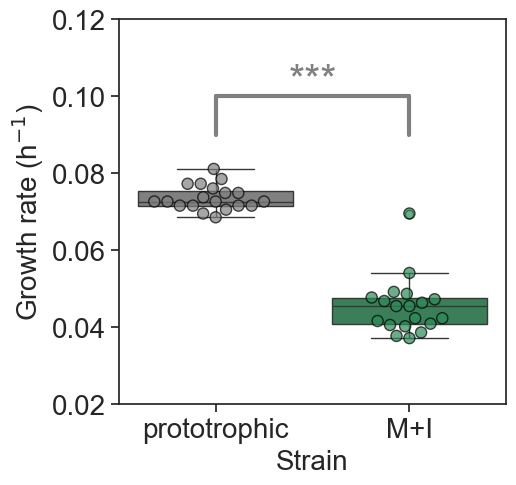

In [215]:
# Define filtered DataFrames
metadata_salinity_filtered = metadata_salinity[(metadata_salinity['Strain'].isin(['WT', 'I+M'])) & (metadata_salinity['Amino acids'] == 0) & (metadata_salinity['Salinity'] == 0)]
metadata_PNP_filtered = metadata_PNP[(metadata_PNP['Strain'].isin(['WT', 'M+I'])) & (metadata_PNP['AA'] == 0) & (metadata_PNP['PNP'] == 0)]
metadata_H2O2_filtered = metadata_H2O2[(metadata_H2O2['Strain'].isin(['WT', 'M+I'])) & (metadata_H2O2['AA'] == 0) & (metadata_H2O2['H2O2'] == 0)]
metadata_SP_filtered = metadata_SP[(metadata_SP['Strain'].isin(['WT', 'M+I'])) & (metadata_SP['AA'] == 0) & (metadata_SP['Specto'] == 0)]

# Concatenate DataFrames
merged_data = pd.concat([metadata_salinity_filtered, metadata_PNP_filtered, metadata_H2O2_filtered, metadata_SP_filtered])

# Reset index
merged_data.reset_index(drop=True, inplace=True)
merged_data['Strain'] = merged_data['Strain'].replace('I+M', 'M+I')
merged_data['Strain'] = merged_data['Strain'].replace('WT', 'prototrophic')

# Create the boxplot
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Strain', y='r', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'})
sns.swarmplot(x='Strain', y='r', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'}, alpha=0.7, size=8, edgecolor='black',linewidth=1)


# Calculate the positions for the vertical and horizontal lines
x_positions = ax.get_xticks()
line_y = 0.10  # Set to 0.25

# Add short vertical lines at the ends of the horizontal line
for x in x_positions:
    ax.plot([x, x], [line_y - 0.01, line_y], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax.plot([x_positions[0], x_positions[-1]], [line_y, line_y], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint = (x_positions[0] + x_positions[-1]) / 2
ax.annotate('***', xy=(midpoint, line_y + 0.001), ha='center', fontsize=30, color='grey')  # Adjusted up by 0.01

# Adjust the x-axis limits to add more space
ax.set_xlim(-0.5, len(x_positions) - 0.5)
ax.set_ylim(0.02, 0.12)  # Set y-axis limit to 0.3


# Add title and labels with larger font sizes
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Growth rate (h$^{-1}$)', fontsize=20)

# Increase tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the boxplot
plt.show()



In [216]:
from scipy.stats import mannwhitneyu

# Calculate mean and standard deviation for each strain
mean_wt = np.mean(merged_data[merged_data['Strain'] == 'WT']['r'])
std_wt = np.std(merged_data[merged_data['Strain'] == 'WT']['r'])

mean_mi = np.mean(merged_data[merged_data['Strain'] == 'M+I']['r'])
std_mi = np.std(merged_data[merged_data['Strain'] == 'M+I']['r'])

results_table = pd.DataFrame({
    'Strain': ['prototrophic', 'M+I'],
    'Mean r': [mean_wt, mean_mi],
    'Standard Deviation r': [std_wt, std_mi]
})

print("Results Table:")
print(results_table)


# Calculate Mann–Whitney U test
result = mannwhitneyu(merged_data[merged_data['Strain'] == 'prototrophic']['r'],
                      merged_data[merged_data['Strain'] == 'M+I']['r'],
                      alternative='two-sided')

# Interpret the results
print("Mann-Whitney U test:")
print("U-statistic:", result.statistic)
print("p-value:", result.pvalue)


results_table = pd.DataFrame(columns=['Statistic', 'p-value'])
results_table.loc['Mann-Whitney U test'] = [result.statistic, result.pvalue]
print("\nResults Table:")
print(results_table)



Results Table:
         Strain    Mean r  Standard Deviation r
0  prototrophic       NaN                   NaN
1           M+I  0.045353              0.007145
Mann-Whitney U test:
U-statistic: 359.5
p-value: 1.8243205870050652e-07

Results Table:
                     Statistic       p-value
Mann-Whitney U test      359.5  1.824321e-07


/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/843375846.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Strain', y='yield', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'})
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/843375846.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Strain', y='yield', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'}, alpha=0.7, size=8, edgecolor='black',linewidth=1)


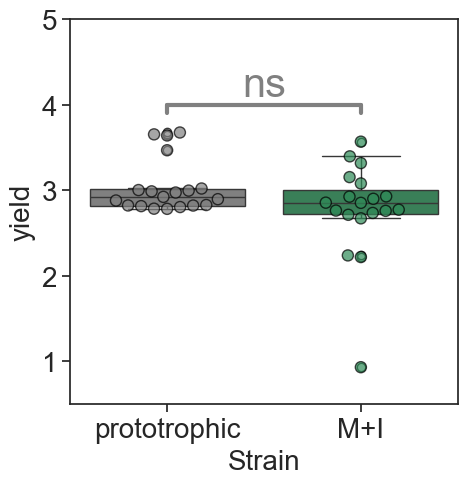

In [217]:
# Define filtered DataFrames
metadata_salinity_filtered = metadata_salinity[(metadata_salinity['Strain'].isin(['WT', 'I+M'])) & (metadata_salinity['Amino acids'] == 0) & (metadata_salinity['Salinity'] == 0)]
metadata_PNP_filtered = metadata_PNP[(metadata_PNP['Strain'].isin(['WT', 'M+I'])) & (metadata_PNP['AA'] == 0) & (metadata_PNP['PNP'] == 0)]
metadata_H2O2_filtered = metadata_H2O2[(metadata_H2O2['Strain'].isin(['WT', 'M+I'])) & (metadata_H2O2['AA'] == 0) & (metadata_H2O2['H2O2'] == 0)]
metadata_SP_filtered = metadata_SP[(metadata_SP['Strain'].isin(['WT', 'M+I'])) & (metadata_SP['AA'] == 0) & (metadata_SP['Specto'] == 0)]

# Concatenate DataFrames
merged_data = pd.concat([metadata_salinity_filtered, metadata_PNP_filtered, metadata_H2O2_filtered, metadata_SP_filtered])

# Reset index
merged_data.reset_index(drop=True, inplace=True)
merged_data['Strain'] = merged_data['Strain'].replace('I+M', 'M+I')
merged_data['Strain'] = merged_data['Strain'].replace('WT', 'prototrophic')

# Create the boxplot
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Strain', y='yield', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'})
sns.swarmplot(x='Strain', y='yield', data=merged_data, palette={'prototrophic': 'gray', 'M+I': '#2E8B57'}, alpha=0.7, size=8, edgecolor='black',linewidth=1)

# Calculate the positions for the vertical and horizontal lines
x_positions = ax.get_xticks()
line_y = 4  

# Add short vertical lines at the ends of the horizontal line
for x in x_positions:
    ax.plot([x, x], [line_y - 0.1, line_y], color='grey', linestyle='-', linewidth=3)

# Add a thicker grey line above the boxplots, ending at the vertical lines
ax.plot([x_positions[0], x_positions[-1]], [line_y, line_y], color='grey', linestyle='-', linewidth=3)

# Add asterisks above the line to indicate significance
midpoint = (x_positions[0] + x_positions[-1]) / 2
ax.annotate('ns', xy=(midpoint, line_y + 0.1), ha='center', fontsize=30, color='grey')  # Adjusted up by 0.01

# Adjust the x-axis limits to add more space
ax.set_xlim(-0.5, len(x_positions) - 0.5)
ax.set_ylim(0.5, 4.5)  # Set y-axis limit to 4.5 and remove extra comma

# Add title and labels with larger font sizes
plt.xlabel('Strain', fontsize=20)
plt.ylabel('yield', fontsize=20)

# Set y-axis ticks to go from 1 to 5 with step 1
plt.yticks(range(1, 6))

# Increase tick font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the boxplot
plt.show()


In [218]:
from scipy.stats import mannwhitneyu

# Calculate mean and standard deviation for each strain
mean_wt = np.mean(merged_data[merged_data['Strain'] == 'prototrophic']['yield'])
std_wt = np.std(merged_data[merged_data['Strain'] == 'prototrophic']['yield'])

mean_mi = np.mean(merged_data[merged_data['Strain'] == 'M+I']['yield'])
std_mi = np.std(merged_data[merged_data['Strain'] == 'M+I']['yield'])

results_table = pd.DataFrame({
    'Strain': ['prototrophic', 'M+I'],
    'Mean r': [mean_wt, mean_mi],
    'Standard Deviation r': [std_wt, std_mi]
})

print("Results Table:")
print(results_table)


# Calculate Mann–Whitney U test
result = mannwhitneyu(merged_data[merged_data['Strain'] == 'prototrophic']['yield'],
                      merged_data[merged_data['Strain'] == 'M+I']['yield'],
                      alternative='two-sided')

# Interpret the results
print("Mann-Whitney U test:")
print("U-statistic:", result.statistic)
print("p-value:", result.pvalue)


results_table = pd.DataFrame(columns=['Statistic', 'p-value'])
results_table.loc['Mann-Whitney U test'] = [result.statistic, result.pvalue]
print("\nResults Table:")
print(results_table)



Results Table:
         Strain    Mean r  Standard Deviation r
0  prototrophic  3.040348              0.305455
1           M+I  2.777672              0.544372
Mann-Whitney U test:
U-statistic: 242.0
p-value: 0.07493212562499939

Results Table:
                     Statistic   p-value
Mann-Whitney U test      242.0  0.074932


## Figures S7-8

In [219]:
#This part loads the second OD-data from the plate-reader ORIGINAL output-format
dwt = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240506 WT+ -Sal, AA levels_OD.xlsx'

dwt = pd.read_excel(dwt, skiprows=28, usecols='B:CU', dtype={'Time': str}).dropna()

In [220]:
# Defines a function to parse time
def parse_time(s):
    v = s.split(' ')
    if len(v)==2:
        fmt = '%Y-%m-%d %H:%M:%S'
        return datetime.strptime(s, fmt) + timedelta(days=1)

    else:
        fmt = '%H:%M:%S'
        return datetime.strptime(s, fmt)

In [221]:
from datetime import datetime, timedelta

t2 = dwt.Time.apply(parse_time)
t2_dif = t2.diff()
t2_dif.iloc[0] = t2_dif.iloc[1] - t2_dif.iloc[1]
dwt['time'] = t2_dif.cumsum().dt.total_seconds()/3600 

In [222]:
#This part loads the metadata of the second experiment, it must be in long format!
mdfile2 = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240506 WT + -Sal, AA levels LF.xlsx'
mdata2 = pd.read_excel(mdfile2, index_col=0).squeeze()

In [223]:
#This part combines the OD data 2 with the metadata 2 in a long-format and substracts a background of bg
bg = 0.085

ldata_2 = []
for i, r in dwt.iterrows():
    time = r['time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata2.loc[i].values]
        ldata_2.append(tmp)
        
ldata2 = pd.DataFrame(ldata_2, columns=['well', 'time', 'OD'] + list(mdata2.columns))


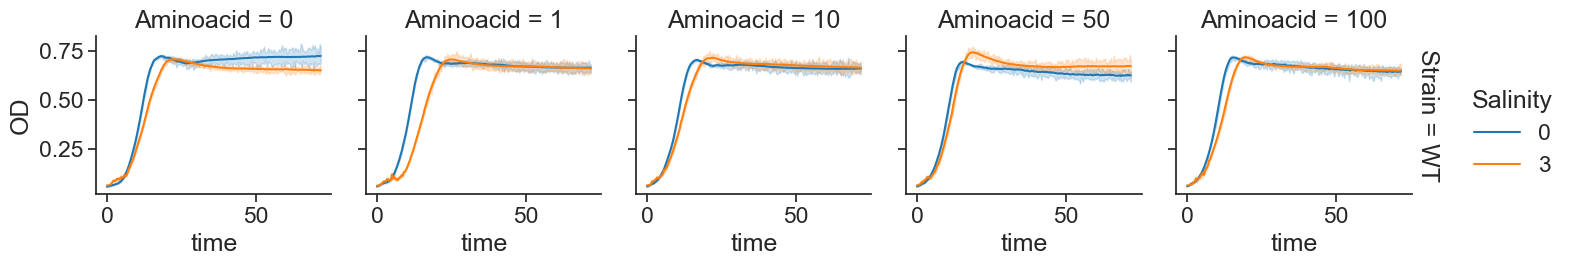

In [224]:
g = sns.FacetGrid(ldata2.query('Strain=="Auxotroph" | Strain=="WT"'), col='Aminoacid', row='Strain', hue='Salinity', margin_titles=True)
g.map(sns.lineplot, "time", "OD", n_boot=10)
g.add_legend()

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3538975213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = ldata2.groupby([pd.cut(ldata2["time"], bins=np.arange(0, 49, 2)), salinity]).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3538975213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = ldata2.groupby([pd.cut(ldata2["time"], bins=np.arange(0, 49, 2)), salinity]).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3538975213.py:8: Fu

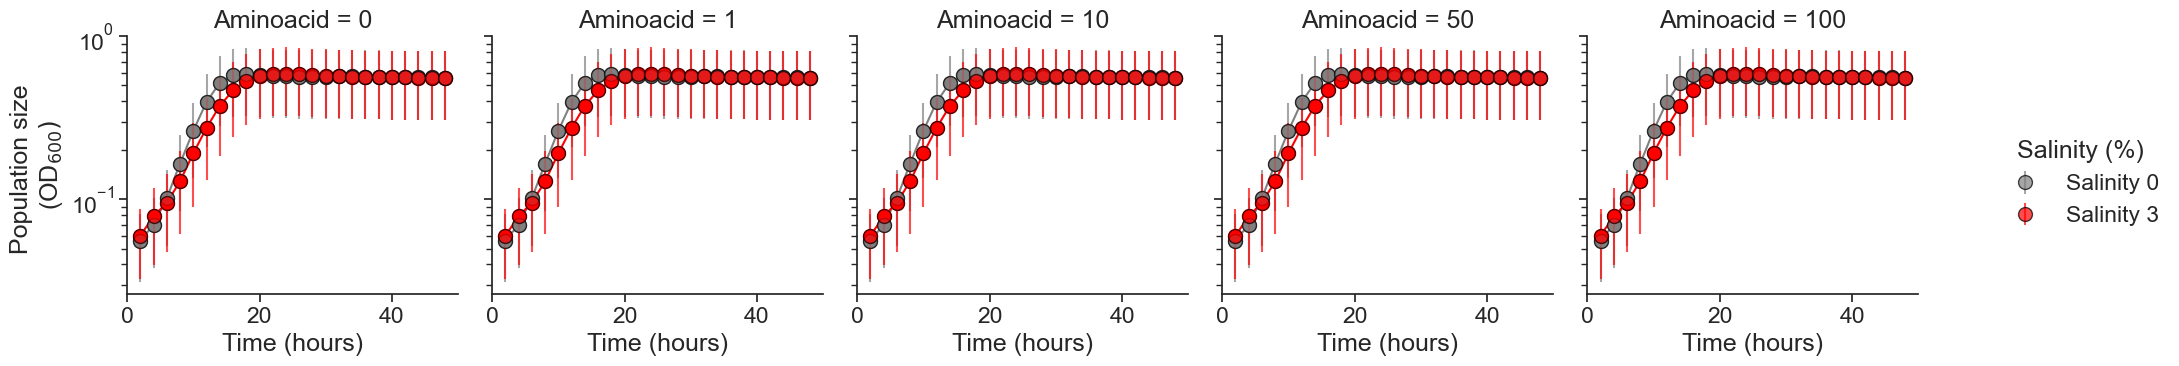

In [225]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data=None, **kwargs):
    ldata2 = kwargs.pop("ldata2")  # Extract ldata2 from kwargs
    x = kwargs.pop("x")
    y = kwargs.pop("y")
    salinity = kwargs.pop("salinity")
    # Group the data by 30-minute intervals and calculate the mean and standard deviation
    sub_data = ldata2.groupby([pd.cut(ldata2["time"], bins=np.arange(0, 49, 2)), salinity]).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))

    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines
    ax = plt.gca()
    for s in sub_data[salinity].unique():
        subset = sub_data[sub_data[salinity] == s]
        color = 'red' if s >= 3 else 'gray'  # Set color based on salinity
        ax.errorbar(subset['interval_right'], subset['mean_OD'], yerr=subset['std_OD'], fmt='o', capsize=0, alpha=0.7, label=f"Salinity {s}", markeredgecolor='black', markersize=10, color=color)
        ax.plot(subset['interval_right'], subset['mean_OD'], marker='o', linestyle='-', markersize=10, color=color)  # Add connecting lines
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=1)  # Place legend below the plot

# Create the FacetGrid with a larger size
g = sns.FacetGrid(ldata2, col='Aminoacid', margin_titles=True, height=4)

# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars, x='time', y='OD', salinity='Salinity', ldata2=ldata2)

# Add the legend with modified title
g.add_legend(title="Salinity (%)")

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size \n(OD$_{600})$")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0, top=1)  # Set the y-axis limits

# Show the plot
plt.show()



Ancestral I

In [226]:
#This part loads the OD-data from the plate-reader ORIGINAL output-format
dfile = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240414Aux - +Sal, AA levelsKinetics.xlsx'
data = pd.read_excel(dfile, skiprows=28, usecols='B:CU', dtype={'Time': str}).dropna()

In [227]:
from datetime import datetime, timedelta

# Defines a function to parse time
def parse_time(s):
    v = s.split(' ')
    if len(v)==2:
        fmt = '%Y-%m-%d %H:%M:%S'
        return datetime.strptime(s, fmt) + timedelta(days=1)

    else:
        fmt = '%H:%M:%S'
        return datetime.strptime(s, fmt)

t = data.Time.apply(parse_time)
t_dif = t.diff()
t_dif.iloc[0] = t_dif.iloc[1] - t_dif.iloc[1]
data['time'] = t_dif.cumsum().dt.total_seconds()/3600 ### Parse metadata

In [228]:
#This part loads the metadata, it must be in long format!
mdfile = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240414Aux - +Sal, AA levels plateLF.xlsx'
mdata = pd.read_excel(mdfile, index_col=0).squeeze()

In [229]:
#This part combines the OD data with the metadata in a long-format
bg = 0.085

ldata_l = []
for i, r in data.iterrows():
    time = r['time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata.loc[i].values]
        ldata_l.append(tmp)

ldata = pd.DataFrame(ldata_l, columns=['well', 'time', 'OD'] + list(mdata.columns))


In [230]:
#This part loads the second OD-data from the plate-reader ORIGINAL output-format
dfile2 = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240425Aux - +Sal, AA levelsKinetics.xlsx'
data2 = pd.read_excel(dfile2, skiprows=28, usecols='B:CU', dtype={'Time': str}).dropna()


In [231]:
t2 = data2.Time.apply(parse_time)
t2_dif = t2.diff()
t2_dif.iloc[0] = t2_dif.iloc[1] - t2_dif.iloc[1]
data2['time'] = t2_dif.cumsum().dt.total_seconds()/3600

In [232]:
### Parse metadata 2
#This part loads the metadata of the second experiment, it must be in long format!
mdfile2 = 'Data/Stress_response/Ancestral_response_to_AA_salinity/20240425Aux - +Sal, AA levels plateLF.xlsx'
mdata2 = pd.read_excel(mdfile2, index_col=0).squeeze()

In [233]:
#This part combines the OD data 2 with the metadata 2 in a long-format and substracts a background of bg
bg = 0.085

ldata_2 = []
for i, r in data2.iterrows():
    time = r['time']
    for i,v in r.iloc[2:-1].items():
        tmp = [i, time, v-bg, *mdata2.loc[i].values]
        ldata_2.append(tmp)

ldata2 = pd.DataFrame(ldata_2, columns=['well', 'time', 'OD'] + list(mdata.columns))

In [234]:
# This part adds the two datasets in a single sheet and adds the additional variables Exp1 or Exp2
ldata1 = ldata.copy()
ldata1['Exp'] = 'Exp1'
ldata2['Exp'] = 'Exp2'
ldata_all = pd.concat((ldata1, ldata2,))

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3757185898.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3757185898.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3757185898.py:4: FutureWarning: The default of obse

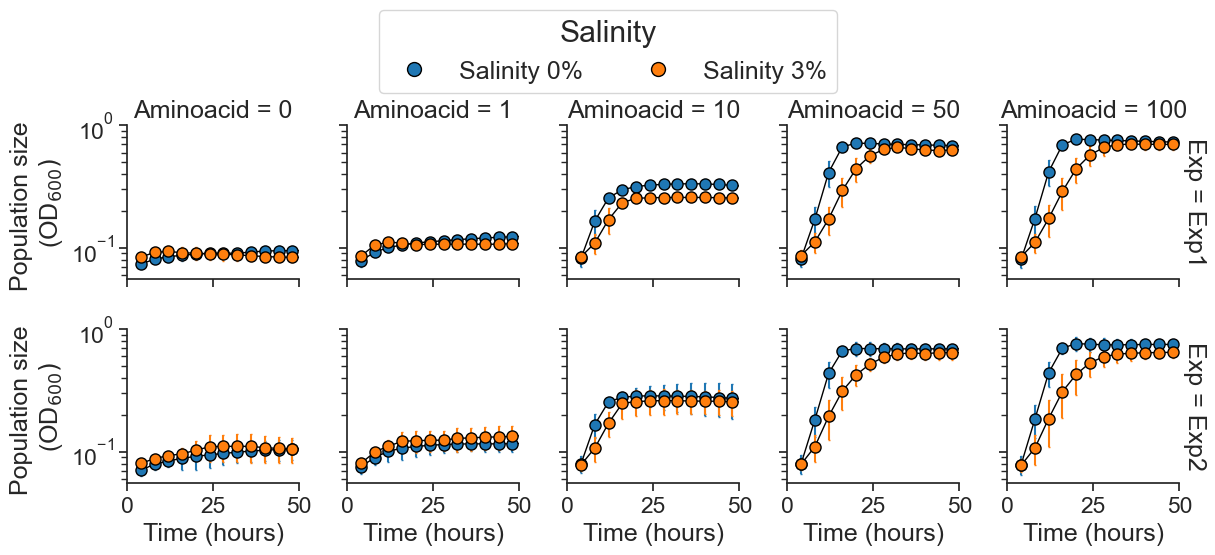

In [235]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    # Group the data by intervals and calculate the mean and standard deviation
    sub_data = data.groupby(pd.cut(data["time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)  # Reset the index to access interval boundaries
    # Calculate the right limits of the intervals and add them as a new column
    sub_data['interval_right'] = sub_data['time'].apply(lambda x: x.right)
    # Plot points with error bars and connecting lines for the means
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, color=kwargs['color'], alpha=1, markeredgecolor='black', markersize=8)
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=5, color='black', linewidth=1)  # Add connecting line for the means
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("OD")  # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_xlim(0, 50)  # Set x-axis limit

# Create the FacetGrid with a larger size
g = sns.FacetGrid(ldata_all.query('Strain=="Auxotroph"'), col='Aminoacid', row='Exp', hue='Salinity', margin_titles=True, height=2.5)

# Map the function for plotting with error bars to the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Set the titles of axes and logarithmic scale on the y-axis
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)")  # Change the x-axis title
    ax.set_ylabel("Population size \n(OD$_{600})$")   # Change the y-axis title
    ax.set_yscale('log')  # Set logarithmic scale on the y-axis
    ax.set_ylim(bottom=0, top=1)  # Set the y-axis limits


# Manually create the legend with two columns
legend_labels = ["Salinity 0%", "Salinity 3%"]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgewidth=1, markeredgecolor='black', markersize=10) for color in sns.color_palette()[:2]]
plt.figlegend(handles=legend_handles, labels=legend_labels, loc='upper center', title="Salinity", title_fontsize='large', fontsize='medium', ncol=2, bbox_to_anchor=(0.5, 1.15))

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


# Figure 5. Metabolic pathway mutations drive evolutionary rescue and mutualism breakdown.

### Dataset

### Figure 5: Cross-resistant experiment

In [236]:
## load OD data for salinity & PNP

def normalize (row, blank_wells):
    blank=row[blank_wells].mean()
    row=(row-blank).clip(lower=1e-4)#.round(3)
    return row


def parse_od(dfile, blank_wells):
    od = pd.read_excel(dfile, skiprows=28, nrows=577)
    od.drop(['T° 600', 'Time', 	"Unnamed: 0"], axis=1, inplace=True)
    od=od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"]=np.arange(0,len(od)) * 5 / 60
    return od

    
    
blank_wells = ['D1','D2','D2','D4','D5','D6','D7','D8','D9','D10','D11','D12', ]


dfile = os.path.join(base_directory, "Data", "Cross_resistance_exp", "Plate_1.xlsx")
od_s = parse_od(dfile, blank_wells)

dfile = os.path.join(base_directory, "Data", "Cross_resistance_exp", "Plate_2.xlsx")
od_p = parse_od(dfile, blank_wells)

Location_key = os.path.join(base_directory, "Data", "Cross_resistance_exp", "Key_CR_GC.xlsx")


In [237]:
# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(Location_key, sheet_name='Key_P1')
tmp['plate'] = 'P1'
tmp['PNP'] = 0.0

tmp2 = pd.read_excel(Location_key, sheet_name='Key_P2')
tmp2['plate'] = 'P2'
tmp2['Salinity'] = 0.0

metadata = pd.concat((tmp, tmp2), ignore_index=True)

# set strain history
def map_strain_history(s):
    if s in range(1,7):
        h = 'salinity'
    elif s in range(7, 12):
        h = 'PNP'
    else:
        h = 'none'
    return h

metadata['history'] = metadata.Strain.map(map_strain_history)
metadata

,Well name,Strain,AA,Salinity,plate,PNP,history
0,A1,WT,0,0.0,P1,0.0,none
1,A2,1,0,0.0,P1,0.0,salinity
2,A3,2,0,0.0,P1,0.0,salinity
3,A4,3,0,0.0,P1,0.0,salinity
4,A5,4,0,0.0,P1,0.0,salinity
...,...,...,...,...,...,...,...
187,H8,7,0,0.0,P2,0.4,PNP
188,H9,8,0,0.0,P2,0.4,PNP
189,H10,9,0,0.0,P2,0.4,PNP
190,H11,10,0,0.0,P2,0.4,PNP


In [238]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/ignaciojosemelerojimenez/Library/Python/3.11/lib/python/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [239]:
## smooth curves
w = 8 #size of smoothing window
od_ss = od_s.copy()
# od_ss = od_s.ewm(alpha=.01, axis=0).mean()
od_ss = od_s.rolling(window=w, center=True, axis=0).mean()
od_ss['Time'] = od_s['Time'] 

od_ps = od_p.copy()
od_ps = od_p.rolling(window=w, center=True, axis=0).mean()
od_ps['Time'] = od_p['Time'] 

ods = {'P1': od_ss, 'P2':od_ps}

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2711795530.py:5: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ss = od_s.rolling(window=w, center=True, axis=0).mean()
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2711795530.py:9: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ps = od_p.rolling(window=w, center=True, axis=0).mean()


In [240]:
metadata['r'] = 0
metadata['yield'] = 0
for i, v in metadata.iterrows():
    gc = ods[v['plate']][v['Well name']]
    r,y = get_growth_rate_and_yield(gc)
    metadata.loc[i, 'r'] = r
    metadata.loc[i, 'yield'] = y


metadata

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2792803345.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17377076061778474' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata.loc[i, 'r'] = r
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/2792803345.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.9811519338708865' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  metadata.loc[i, 'yield'] = y


,Well name,Strain,AA,Salinity,plate,PNP,history,r,yield
0,A1,WT,0,0.0,P1,0.0,none,0.173771,3.981152
1,A2,1,0,0.0,P1,0.0,salinity,0.124758,1.225736
2,A3,2,0,0.0,P1,0.0,salinity,0.147442,1.423172
3,A4,3,0,0.0,P1,0.0,salinity,0.139017,1.192764
4,A5,4,0,0.0,P1,0.0,salinity,0.143105,1.423776
...,...,...,...,...,...,...,...,...,...
187,H8,7,0,0.0,P2,0.4,PNP,0.022016,0.894922
188,H9,8,0,0.0,P2,0.4,PNP,0.000000,0.222363
189,H10,9,0,0.0,P2,0.4,PNP,0.074855,0.646048
190,H11,10,0,0.0,P2,0.4,PNP,0.095404,0.665057


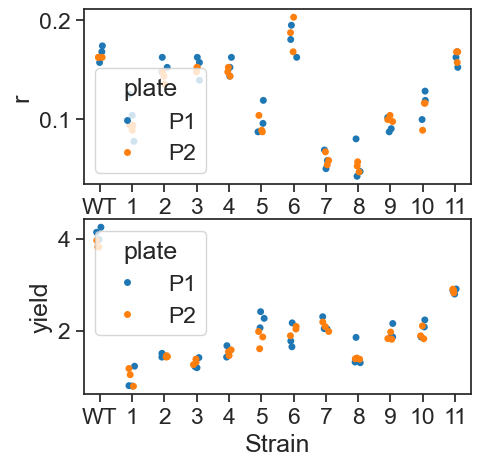

In [241]:
## growth without stress
d =metadata.query('Salinity==0 and PNP==0 and Strain!="control"')
params = ['r', 'yield', ]
fig, axs = subplots(2,1, figsize=(5,5))
for ax,param in zip(axs,params):
    sns.stripplot(data=d, x='Strain', y=param, hue='plate', ax=ax)

<Axes: xlabel='Strain', ylabel='r'>

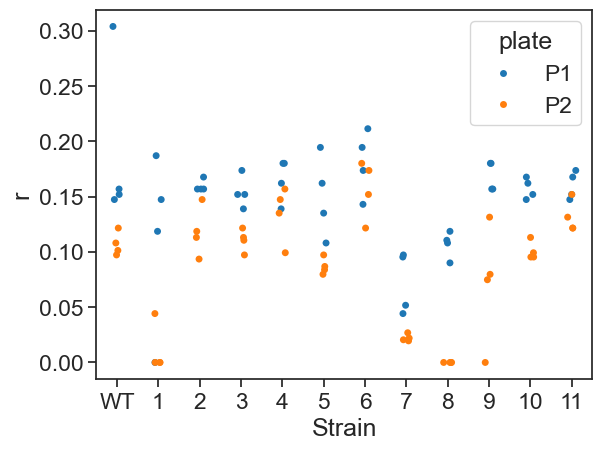

In [242]:
## growth with stress (P1=Salinity, P2=PNP)
d = metadata.query('(Salinity!=0 or PNP!=0) and Strain!="control"')
sns.stripplot(data=d, x='Strain', y='r', hue='plate')

In [243]:
custom_colors = {
    "WT": "gray",  # Azul oscuro para WT
    1: "#FF6347",  # Naranja para cepa 1-6
    2: "#FF6347",  # Naranja para cepa 1-6
    3: "#FF6347",  # Naranja para cepa 1-6
    4: "#FF6347",  # Naranja para cepa 1-6
    5: "#FF6347",  # Naranja para cepa 1-6
    6: "#FF6347",  # Naranja para cepa 1-6
    7: "#9370DB",  # Verde para cepa 7-11
    8: "#9370DB",  # Verde para cepa 7-11
    9: "#9370DB",  # Verde para cepa 7-11
    10: "#9370DB",  # Verde para cepa 7-11
    11: "#9370DB",  # Verde para cepa 7-11
    "control": "gray",  # Gris para control
}

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1970727473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['r'] = pd.to_numeric(d['r'], errors='coerce')
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1970727473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['yield'] = pd.to_numeric(d['yield'], errors='coerce')
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1970727473.py:134: UserWarning: This figure includes Axes that are not compatible with 

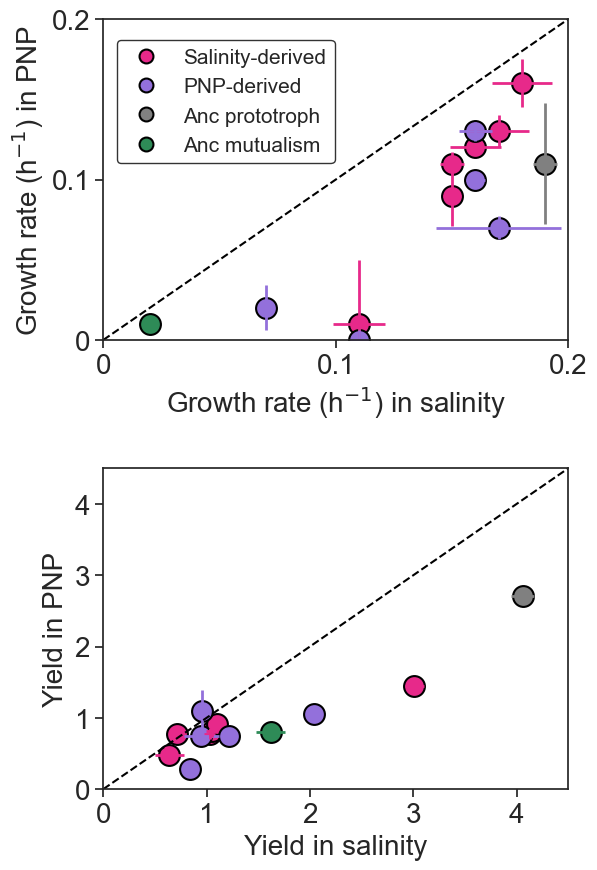

In [244]:
# Filter the DataFrame
d = metadata.query('(Salinity!=0 or PNP!=0) and Strain!="control"')

# Convert relevant columns to numeric, forcing errors to NaN
d['r'] = pd.to_numeric(d['r'], errors='coerce')
d['yield'] = pd.to_numeric(d['yield'], errors='coerce')

# Drop rows with NaN values in the specified columns
d = d.dropna(subset=['r', 'yield'])

# Define custom colors
custom_colors = {
    "WT": "gray",
    1: "#e7298a",
    2: "#e7298a",
    3: "#e7298a",
    4: "#e7298a",
    5: "#e7298a",
    6: "#e7298a",
    7: "#9370DB",
    8: "#9370DB",
    9: "#9370DB",
    10: "#9370DB",
    11: "#9370DB",
    "control": "gray",
}

# Group by 'Strain' and 'plate', and calculate the mean for numeric columns
numeric_cols = d.select_dtypes(include=['number']).columns
ms = d.groupby(['Strain', 'plate'])[numeric_cols].mean()
sems = d.groupby(['Strain', 'plate'])[numeric_cols].sem()

# Define parameters and create subplots
params = ['r', 'yield']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10), gridspec_kw={'hspace': 0.4})
axs = [ax1, ax2]

# Define the font size for labels
label_fontsize = 20

for ax, param in zip(axs, params):
    x = []
    y = []
    xerr = []
    yerr = []
    cs = []
    for s, c in custom_colors.items():
        if s == 'control':
            continue
        m1 = round(ms.xs((s, 'P1'))[param], 2)
        sem1 = round(sems.xs((s, 'P1'))[param], 3)

        m2 = round(ms.xs((s, 'P2'))[param], 2)
        sem2 = round(sems.xs((s, 'P2'))[param], 3)

        x.append(m1)
        y.append(m2)
        xerr.append(sem1)
        yerr.append(sem2)
        cs.append(c)

        # Draw colored circle with opacity
        ax.plot(m1, m2, 'o', color=c, alpha=1, ms=15, markeredgecolor='black', markeredgewidth=1.5)

    # Add specific data for 'I+M' and 'M+I'
    if param == 'r':
        mean1 = round(0.02430147485074507, 2)
        sem1 = round(0.002675102159323856, 3)
        mean2 = round(0.008015862028282705, 2)
        sem2 = round(0.002672976344125577, 3)
    elif param == 'yield':
        mean1 = round(1.624198476781271, 2)
        sem1 = round(0.041899329920463385, 3)
        mean2 = round(0.8027973289077173, 2)
        sem2 = round(0.1376813177258263, 3)

    ax.plot(mean1, mean2, 'o', color='#2E8B57', alpha=1, ms=15, markeredgecolor='black', markeredgewidth=1.5)
    x.append(mean1)
    y.append(mean2)
    xerr.append(sem1)
    yerr.append(sem2)
    cs.append('#2E8B57')

    ax.errorbar(x, y, xerr, yerr, '.', ms=0, ecolor=cs, elinewidth=2)

    # Change the axis titles here with increased font size
    if param == 'r':
        ax.set_xlabel('Growth rate (h$^{-1}$) in salinity', fontsize=label_fontsize)  # X-axis title for 'r'
        ax.set_ylabel('Growth rate (h$^{-1}$) in PNP', fontsize=label_fontsize)       # Y-axis title for 'r'
    elif param == 'yield':
        ax.set_xlabel('Yield in salinity', fontsize=label_fontsize)        # X-axis title for 'yield'
        ax.set_ylabel('Yield in PNP', fontsize=label_fontsize)             # Y-axis title for 'yield'

# Set independent axis limits
ax1.plot([0, 0.2], [0, 0.2], '--', c='k')
ax1.set_xlim(0, 0.2)
ax1.set_ylim(0, 0.2)

# Custom formatter for y-axis to ensure 0 has no decimals
def custom_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x:.1f}'

ax1.xaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

# Add custom y-ticks for the first plot with steps of 0.1
ax1.set_yticks([i * 0.1 for i in range(3)])
ax1.set_xticks([i * 0.1 for i in range(3)])

ax2.plot([0, 4.5], [0, 4.5], '--', c='k')
ax2.set_xlim(0, 4.5)
ax2.set_ylim(0, 4.5)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}'))

# Increase font size for tick labels
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=label_fontsize)

# Custom legend with black border and transparency
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#e7298a', markersize=10, label='Salinity-derived', markeredgewidth=1.5, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#9370DB', markersize=10, label='PNP-derived', markeredgewidth=1.5, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Anc prototroph', markeredgewidth=1.5, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2E8B57', markersize=10, label='Anc mutualism', markeredgewidth=1.5, markeredgecolor='black'),
]

# Add legend with black border and transparency at the bottom
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.13, 0.87), fontsize='small', ncol=1, edgecolor='black', framealpha=0.8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Figure S6

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3492891018.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/3492891018.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels


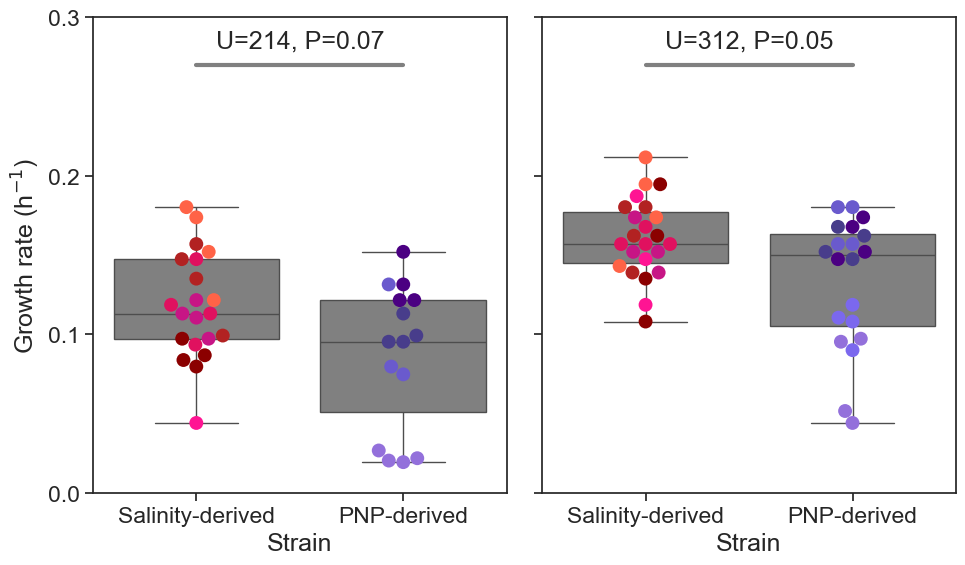

In [245]:

# Data filtering for PNP condition and filtering out r <= 0
salinity_strains_in_PNP = metadata[(metadata['Strain'].isin([1, 2, 3, 4, 5, 6])) & 
                                   (metadata['PNP'] == 0.4) & 
                                   (metadata['r'] > 0)]

PNP_strains_in_PNP = metadata[(metadata['Strain'].isin([7, 8, 9, 10, 11])) & 
                               (metadata['PNP'] == 0.4) & 
                               (metadata['r'] > 0)]

# Perform Mann-Whitney U test between Salinity and PNP under PNP condition
u_stat_salinity_pnp, p_value_salinity_pnp = mannwhitneyu(salinity_strains_in_PNP['r'], PNP_strains_in_PNP['r'], alternative='two-sided')

# Define a gradient palette from pink to purple for points
palette_points = sns.color_palette([
    "#ff1493", "#e0115f", "#c71585", "#b22222", "#8b0000", "#ff6347", 
    "#9370DB", "#7b68ee", "#6a5acd", "#483d8b", "#4b0082"
])

# Map strains to colors using the gradient palette for points
color_palette_points = {1: palette_points[0], 2: palette_points[1], 3: palette_points[2], 4: palette_points[3], 5: palette_points[4], 6: palette_points[5], 
                        7: palette_points[6], 8: palette_points[7], 9: palette_points[8], 10: palette_points[9], 11: palette_points[10]}

# Data filtering for Salinity condition and filtering out r <= 0
salinity_strains_in_sal = metadata[(metadata['Strain'].isin([1, 2, 3, 4, 5, 6])) & 
                                   (metadata['Salinity'] == 3) & 
                                   (metadata['r'] > 0)]

PNP_strains_in_sal = metadata[(metadata['Strain'].isin([7, 8, 9, 10, 11])) & 
                               (metadata['Salinity'] == 3) & 
                               (metadata['r'] > 0)]

# Perform Mann-Whitney U test between Salinity and PNP under Salinity condition
u_stat_salinity_sal, p_value_salinity_sal = mannwhitneyu(salinity_strains_in_sal['r'], PNP_strains_in_sal['r'], alternative='two-sided')

# Create figure and subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Concatenate the data into a single DataFrame for plotting under PNP condition
plot_data_pnp = pd.concat([salinity_strains_in_PNP.assign(Treatment='Derived from Salinity'), 
                           PNP_strains_in_PNP.assign(Treatment='Derived from PNP')])

# Boxplot with all gray color under PNP condition on ax1
sns.boxplot(x='Treatment', y='r', data=plot_data_pnp, color="grey", ax=ax1)
ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # Limit to one decimal on y-axis

# Overlay swarmplot with custom colors and larger points with black edge for markers under PNP condition on ax1
sns.swarmplot(x='Treatment', y='r', data=plot_data_pnp, hue='Strain', palette=color_palette_points, size=10, edgecolor='black', ax=ax1)

# Remove legend on ax1
ax1.legend().remove()

# Add statistical annotations to the boxplot outside the plot area under PNP condition on ax1
ax1.text(0.5, 0.95, f'U={u_stat_salinity_pnp:.0f}, P={p_value_salinity_pnp:.2f}', ha='center', va='center', transform=ax1.transAxes, fontsize=18)

# Draw a horizontal line below the boxplot to indicate the mean difference under PNP condition
mean_diff_pnp = salinity_strains_in_PNP['r'].mean() - PNP_strains_in_PNP['r'].mean()
ax1.axhline(y=0.27, xmin=0.25, xmax=0.75, color='grey', linewidth=3)

ax1.set_title('')
ax1.set_xlabel('Strain')
ax1.set_ylabel('Growth rate (h$^{-1}$)')

# Customizing ticks and gridlines
ax1.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
ax1.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
ax1.yaxis.set_ticks([0, 0.1, 0.3])  # Set y-axis ticks
ax1.grid(False)  # Remove gridlines

# Concatenate the data into a single DataFrame for plotting under Salinity condition
plot_data_sal = pd.concat([salinity_strains_in_sal.assign(Treatment='Derived from Salinity'), 
                           PNP_strains_in_sal.assign(Treatment='Derived from PNP')])

# Boxplot with all gray color under Salinity condition on ax2
sns.boxplot(x='Treatment', y='r', data=plot_data_sal, color="grey", ax=ax2)
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # Limit to one decimal on y-axis

# Overlay swarmplot with custom colors and larger points with black edge for markers under Salinity condition on ax2
sns.swarmplot(x='Treatment', y='r', data=plot_data_sal, hue='Strain', palette=color_palette_points, size=10, edgecolor='black', ax=ax2)

# Remove legend on ax2
ax2.legend().remove()

# Add statistical annotations to the boxplot outside the plot area under Salinity condition on ax2
ax2.text(0.5, 0.95, f'U={u_stat_salinity_sal:.0f}, P={p_value_salinity_sal:.2f}', ha='center', va='center', transform=ax2.transAxes, fontsize=18)

# Draw a horizontal line below the boxplot to indicate the mean difference under Salinity condition
mean_diff_sal = salinity_strains_in_sal['r'].mean() - PNP_strains_in_sal['r'].mean()
ax2.axhline(y=0.27, xmin=0.25, xmax=0.75, color='grey', linewidth=3)

ax2.set_title('')
ax2.set_xlabel('Strain')
ax2.set_ylabel('Growth rate (h$^{-1}$)')

# Customizing ticks and gridlines
ax2.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
ax2.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
ax2.yaxis.set_ticks([0, 0.1, 0.2, 0.3])  # Set y-axis ticks
ax2.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()



/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1954462931.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_11402/1954462931.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels


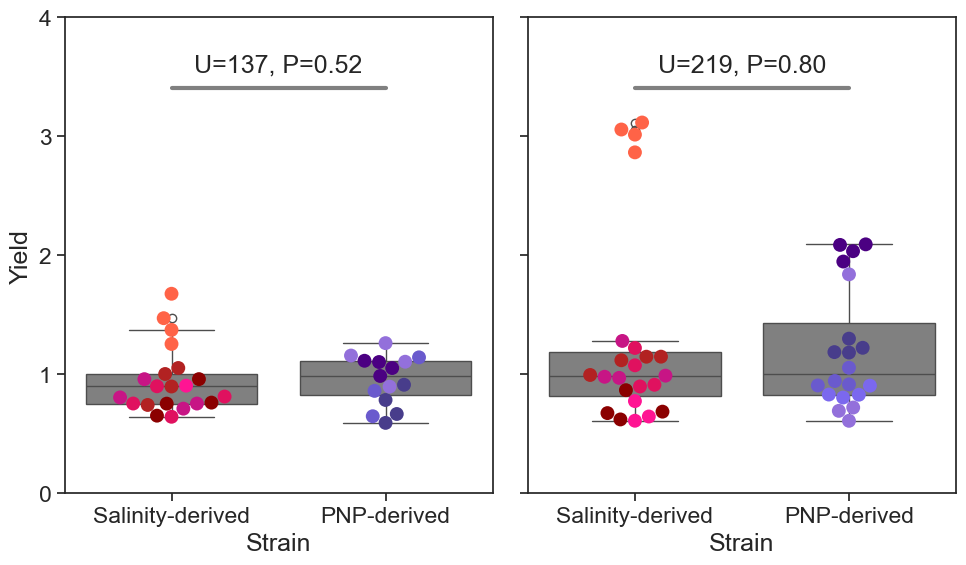

In [246]:
# Data filtering for PNP condition and filtering out r <= 0 and yield <= 0
salinity_strains_in_PNP = metadata[(metadata['Strain'].isin([1, 2, 3, 4, 5, 6])) & 
                                   (metadata['PNP'] == 0.4) & 
                                   (metadata['r'] > 0) & 
                                   (metadata['yield'] > 0)]

PNP_strains_in_PNP = metadata[(metadata['Strain'].isin([7, 8, 9, 10, 11])) & 
                               (metadata['PNP'] == 0.4) & 
                               (metadata['r'] > 0) & 
                               (metadata['yield'] > 0)]

# Perform Mann-Whitney U test between Salinity and PNP under PNP condition
u_stat_salinity_pnp, p_value_salinity_pnp = mannwhitneyu(salinity_strains_in_PNP['yield'], PNP_strains_in_PNP['yield'], alternative='two-sided')

# Define a gradient palette from pink to purple for points
palette_points = sns.color_palette([
    "#ff1493", "#e0115f", "#c71585", "#b22222", "#8b0000", "#ff6347", 
    "#9370DB", "#7b68ee", "#6a5acd", "#483d8b", "#4b0082"
])

# Map strains to colors using the gradient palette for points
color_palette_points = {1: palette_points[0], 2: palette_points[1], 3: palette_points[2], 
                        4: palette_points[3], 5: palette_points[4], 6: palette_points[5], 
                        7: palette_points[6], 8: palette_points[7], 9: palette_points[8], 
                        10: palette_points[9], 11: palette_points[10]}

# Data filtering for Salinity condition and filtering out r <= 0 and yield <= 0
salinity_strains_in_sal = metadata[(metadata['Strain'].isin([1, 2, 3, 4, 5, 6])) & 
                                   (metadata['Salinity'] == 3) & 
                                   (metadata['r'] > 0) & 
                                   (metadata['yield'] > 0)]

PNP_strains_in_sal = metadata[(metadata['Strain'].isin([7, 8, 9, 10, 11])) & 
                               (metadata['Salinity'] == 3) & 
                               (metadata['r'] > 0) & 
                               (metadata['yield'] > 0)]

# Perform Mann-Whitney U test between Salinity and PNP under Salinity condition
u_stat_salinity_sal, p_value_salinity_sal = mannwhitneyu(salinity_strains_in_sal['yield'], PNP_strains_in_sal['yield'], alternative='two-sided')

# Create figure and subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Concatenate the data into a single DataFrame for plotting under PNP condition
plot_data_pnp = pd.concat([salinity_strains_in_PNP.assign(Treatment='Derived from Salinity'), 
                           PNP_strains_in_PNP.assign(Treatment='Derived from PNP')])

# Boxplot with all gray color under PNP condition on ax1
sns.boxplot(x='Treatment', y='yield', data=plot_data_pnp, color="grey", ax=ax1)
ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # No decimales en y-axis

# Overlay swarmplot with custom colors and larger points with black edge for markers under PNP condition on ax1
sns.swarmplot(x='Treatment', y='yield', data=plot_data_pnp, hue='Strain', palette=color_palette_points, size=10, edgecolor='black', ax=ax1)

# Remove legend on ax1
ax1.legend().remove()

# Add statistical annotations to the boxplot outside the plot area under PNP condition on ax1
ax1.text(0.5, 0.9, f'U={int(u_stat_salinity_pnp)}, P={p_value_salinity_pnp:.2f}', ha='center', va='center', transform=ax1.transAxes, fontsize=18)

# Draw a horizontal line below the boxplot to indicate the mean difference under PNP condition
mean_diff_pnp = salinity_strains_in_PNP['yield'].mean() - PNP_strains_in_PNP['yield'].mean()
ax1.axhline(y=3.4, xmin=0.25, xmax=0.75, color='grey', linewidth=3)

ax1.set_title('')
ax1.set_xlabel('Strain')
ax1.set_ylabel('Yield')

# Customizing ticks and gridlines
ax1.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
ax1.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
ax1.set_ylim(0, 4)  # Set y-axis range
ax1.yaxis.set_ticks([0, 1, 2, 3, 4])  # Set y-axis ticks
ax1.grid(False)  # Remove gridlines

# Concatenate the data into a single DataFrame for plotting under Salinity condition
plot_data_sal = pd.concat([salinity_strains_in_sal.assign(Treatment='Derived from Salinity'), 
                           PNP_strains_in_sal.assign(Treatment='Derived from PNP')])

# Boxplot with all gray color under Salinity condition on ax2
sns.boxplot(x='Treatment', y='yield', data=plot_data_sal, color="grey", ax=ax2)
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # No decimales en y-axis

# Overlay swarmplot with custom colors and larger points with black edge for markers under Salinity condition on ax2
sns.swarmplot(x='Treatment', y='yield', data=plot_data_sal, hue='Strain', palette=color_palette_points, size=10, edgecolor='black', ax=ax2)

# Remove legend on ax2
ax2.legend().remove()

# Add statistical annotations to the boxplot outside the plot area under Salinity condition on ax2
ax2.text(0.5, 0.9, f'U={int(u_stat_salinity_sal)}, P={p_value_salinity_sal:.2f}', ha='center', va='center', transform=ax2.transAxes, fontsize=18)

# Draw a horizontal line below the boxplot to indicate the mean difference under Salinity condition
mean_diff_sal = salinity_strains_in_sal['yield'].mean() - PNP_strains_in_sal['yield'].mean()
ax2.axhline(y=3.4, xmin=0.25, xmax=0.75, color='grey', linewidth=3)

ax2.set_title('')
ax2.set_xlabel('Strain')
ax2.set_ylabel('Yield')

# Customizing ticks and gridlines
ax2.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
ax2.set_xticklabels(['Salinity-derived', 'PNP-derived'])  # Set custom x-axis tick labels
ax2.set_ylim(0, 4)  # Set y-axis range
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])  # Set y-axis ticks
ax2.grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()


Data from the mutations was obtained from the .html files generated by breseq.

#### Salinity mutations

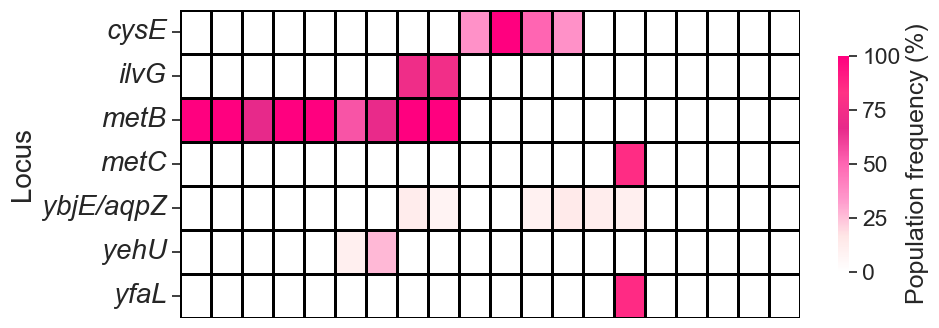

In [247]:
from matplotlib.colors import LinearSegmentedColormap
# salinity Data
data = {
    'gene': ['cysE', 'ilvG', 'metB', 'metC', 'yahC', 'ybjE/aqpZ', 'yehU', 'yfaL'],
    '1': [0.00, 0.00, 0.00, 0.00, 0.00, 12.40, 0.00, 0.00],
    '2': [0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    '3': [36.10, 0.00, 0.00, 0.00, 40.30, 0.00, 0.00, 0.00],
    '4': [0.00, 0.00, 0.00, 85.50, 0.00, 11.10, 0.00, 86.20],
    '5': [100.00, 0.00, 0.00, 0.00, 42.10, 0.00, 0.00, 0.00],
    '6': [0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    '7': [36.00, 0.00, 0.00, 0.00, 0.00, 14.20, 0.00, 0.00],
    '8': [0.00, 0.00, 68.30, 0.00, 66.00, 0.00, 26.80, 0.00],
    '9': [0.00, 0.00, 66.50, 0.00, 81.00, 0.00, 0.00, 0.00],
    '10': [0.00, 0.00, 54.80, 0.00, 77.00, 0.00, 10.80, 0.000],
    '11': [50.00, 0.00, 0.00, 0.00, 0.00, 9.50, 0.00, 0.00],
    '12': [0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    '13': [0.00, 74.60, 100.00, 0.00, 0.00, 8.50, 0.00, 0.00],
    '14': [0.00, 72.50, 100.00, 0.00, 0.00, 13.1, 0.00, 0.00],
    '15': [0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_1': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_2': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_3': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_4': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_5': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
}

# Create DataFrame
df = pd.DataFrame(data)

# Eliminate the 'yahC' row
df = df[df['gene'] != 'yahC']

# Calculate the correlation matrix
corr_matrix = df.drop(columns='gene').corr()

# Reorganize the DataFrame based on the correlation matrix
ordered_columns = corr_matrix.sum().sort_values(ascending=False).index
df_ordered = df[['gene'] + list(ordered_columns)]

# Moving WT columns to the end
wt_columns = [col for col in df_ordered.columns if 'WT_' in col]
non_wt_columns = [col for col in df_ordered.columns if col not in wt_columns]
df_ordered = df_ordered[non_wt_columns + wt_columns]

cmap = LinearSegmentedColormap.from_list('custom_pink', ['#ffffff', '#ffe6e6', '#ff99cc', '#ff66b2', '#e7298a', '#ff3385', '#ff007f'])

# Create the heatmap
plt.figure(figsize=(10, 4))
ax = plt.axes()
sns.heatmap(df_ordered.set_index('gene'), cmap=cmap, cbar=True, linecolor='black', linewidths=1,
            cbar_kws={'label': 'Population frequency (%)', 'orientation': 'vertical', 'ticks': [0, 25, 50, 75, 100], 'shrink': 0.7},
            annot=False, vmin=0, vmax=100, ax=ax)


ax.xaxis.set_ticks([])
ax.tick_params(axis='y', labelsize=20)

# Set y-axis tick labels in italic using TickLabels
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')

# Set axis labels
ax.set_xlabel("")
ax.set_ylabel("Locus",fontsize=20)


plt.show()

PNP mutations


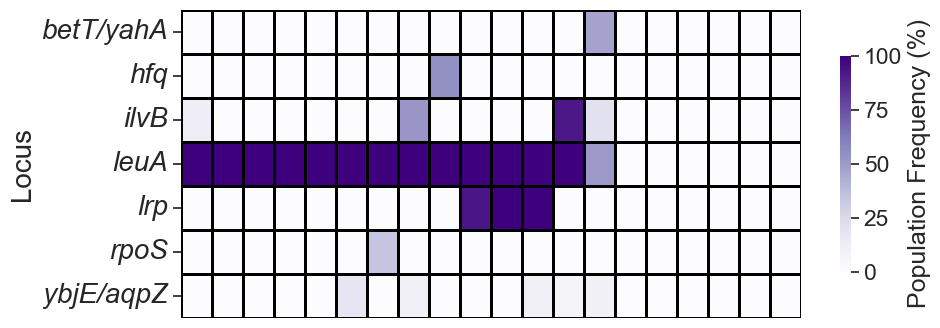

In [248]:
# Data
data = {
    'gene': ['betT/yahA', 'hfq', 'ilvB', 'leuA', 'leuL', 'lrp', 'rpoS', 'ybjE/aqpZ'],
    '1': [0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 34.00, 0.00],
    '2': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    '3': [0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 17.90],
    '4': [0.00, 0.00, 12.40, 100.00, 0.00, 0.00, 0.00, 0.00],
    '5': [0.00, 54.40, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00],
    '6': [0.00, 0.00, 92.10, 100.00, 0.00, 0.00, 0.00, 6.30],
    '7': [0.00, 0.00, 0.00, 100.00, 100.00, 0.00, 0.00, 0.00],
    '8': [0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00],
    '9': [0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00],
    '10': [0.00, 0.00, 0.00, 100.00, 0.00, 100.00, 0.00, 10.20],
    '11': [0.00, 0.00, 0.00, 100.00, 0.00, 93.20, 0.00, 0.00],
    '12': [47.10, 0.00, 20.40, 51.00, 0.00, 0.00, 0.00, 10.40],
    '13': [0.00, 0.00, 0.00, 100.00, 0.00, 100.00, 0.00, 0.00],
    '14': [0.00, 0.00, 52.20, 100.00, 0.00, 0.00, 0.00, 10.50],
    '15': [0.00, 0.00, 0.00, 100.00, 0.00, 0.00, 0.00, 0.00],
    'WT_1': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_2': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_3': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_4': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'WT_5': [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop 'leuL' row as it seems unnecessary
df = df[df['gene'] != 'leuL']

# Calculate the correlation matrix
corr_matrix = df.drop(columns='gene').corr()

# Reorganize the DataFrame based on the correlation matrix
ordered_columns = corr_matrix.sum().sort_values(ascending=False).index
df_ordered = df[['gene'] + list(ordered_columns)]

# Set style and font scale
sns.set(font_scale=1.5, style='ticks')

# Create the heatmap
plt.figure(figsize=(10, 4))
ax = plt.axes()
sns.heatmap(df_ordered.set_index('gene'), cmap="Purples", cbar=True, linecolor='black', linewidths=1,
            cbar_kws={'label': 'Population Frequency (%)', 'orientation': 'vertical', 'ticks': [0, 25, 50, 75, 100], 'shrink': 0.7},
            annot=False, vmin=0, vmax=100, ax=ax)

# Set axis labels
ax.set_xlabel("")
ax.set_ylabel("Locys",fontsize=20)

ax.xaxis.set_ticks([])
ax.tick_params(axis='y', labelsize=20)

# Set y-axis tick labels in italic using TickLabels
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')

# Set axis labels
ax.set_xlabel("")
ax.set_ylabel("Locus",fontsize=20)


plt.show()

### Type of mutations by population

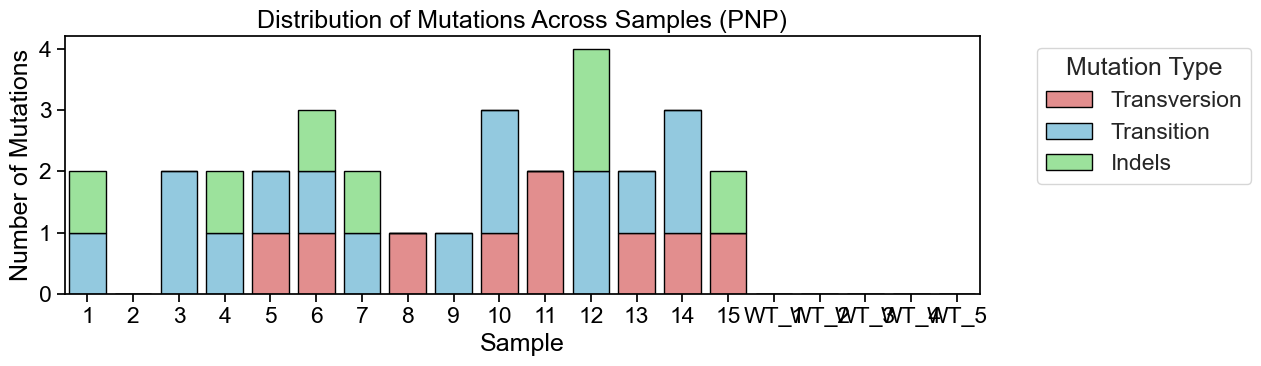

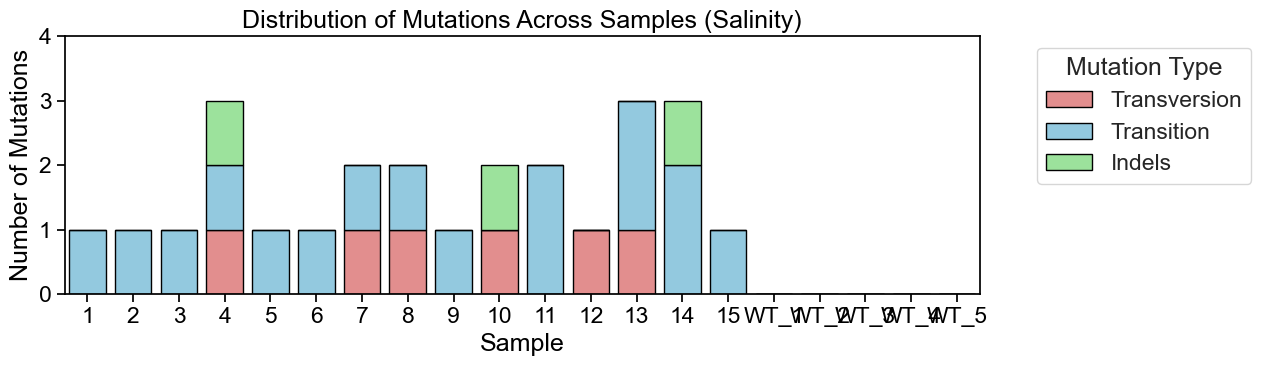

In [249]:
# PNP Data
data_pnp = {
    'Sample': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 'WT_1', 'WT_2', 'WT_3', 'WT_4', 'WT_5'],
    'Transversion': [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    'Transition': [1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0],
    'Indels': [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0],
}

# Salinity Data
data_salinity = {
    'Sample': data_pnp['Sample'],
    'Transversion': [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    'Transition': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0],
    'Indels': [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
}

# Plotting function
def plot_mutations(data, title):
    df = pd.DataFrame(data)
    plt.figure(figsize=(13, 4))
    ax = sns.barplot(x='Sample', y='Transversion', data=df, color='lightcoral', label='Transversion', edgecolor='black')
    ax = sns.barplot(x='Sample', y='Transition', data=df, color='skyblue', label='Transition', bottom=df['Transversion'], edgecolor='black')
    ax = sns.barplot(x='Sample', y='Indels', data=df, color='lightgreen', label='Indels', bottom=df['Transversion']+df['Transition'], edgecolor='black')
    ax.set_xlabel("Sample", color='black')
    ax.set_ylabel("Number of Mutations", color='black')
    ax.set_title(title, color='black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.set_xticks(range(len(df['Sample'])))
    ax.set_xticklabels(df['Sample'])
    ax.set_yticks(range(5))
    ax.set_yticklabels(range(5), color='black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.set_facecolor('white')
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.legend(title='Mutation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plotting both datasets
plot_mutations(data_pnp, "Distribution of Mutations Across Samples (PNP)")
plot_mutations(data_salinity, "Distribution of Mutations Across Samples (Salinity)")

### Figure S9

<Figure size 1200x800 with 0 Axes>

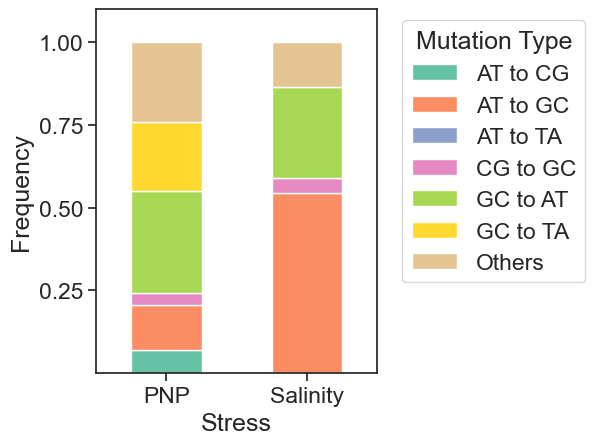

In [250]:
# Datos de Salinity
data_salinity = {
    'number': [0, 12, 0, 1, 6, 0, 3],
    'Mutation': ['AT to CG', 'AT to GC', 'AT to TA', 'CG to GC', 'GC to AT', 'GC to TA', 'Others'],
    'Type': ['Transversion', 'Transition', 'Transversion', 'Transversion', 'Transition', 'Transversion', 'others']
}

# Datos de PNP
data_pnp = {
    'number': [2, 4, 0, 1, 9, 6, 7],
    'Mutation': ['AT to CG', 'AT to GC', 'AT to TA', 'CG to GC', 'GC to AT', 'GC to TA', 'Others'],
    'Type': ['Transversion', 'Transition', 'Transversion', 'Transversion', 'Transition', 'Transversion', 'others']
}

# Convertir a DataFrames
df_salinity = pd.DataFrame(data_salinity)
df_pnp = pd.DataFrame(data_pnp)

# Agregar una columna 'Category' para distinguir entre Salinity y PNP
df_salinity['Category'] = 'Salinity'
df_pnp['Category'] = 'PNP'

# Concatenar los DataFrames
df_combined = pd.concat([df_salinity, df_pnp])

# Calcular las frecuencias relativas
df_combined['Frequency'] = df_combined.groupby('Category')['number'].transform(lambda x: x / x.sum())

# Agrupar por categoría (Salinity/PNP) y tipo de mutación, y sumar las frecuencias
grouped = df_combined.groupby(['Category', 'Mutation'])['Frequency'].sum().unstack().fillna(0)

# Configurar la paleta de colores
colors = sns.color_palette("pastel")

# Plot
plt.figure(figsize=(12, 8))
ax = grouped.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))
# Set y-axis limit
# Set y-axis limit and ticks
plt.ylim(0, 1.1)
plt.yticks([0.25, 0.5, 0.75, 1.0,])

# Configurar etiquetas y título
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico
plt.legend(title='Mutation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se superpongan los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [251]:
# Calculate the percentage of each type of mutation
total_mutations = df_combined['number'].sum()
gc_to_at_mutations = df_combined[df_combined['Mutation'] == 'GC to AT']['number'].sum()
at_to_gc_mutations = df_combined[df_combined['Mutation'] == 'AT To GC']['number'].sum()

non_synonymous_snps = df_combined[df_combined['Mutation'] != 'others']['number'].sum()
non_synonymous_snps_percentage = (non_synonymous_snps / total_mutations) * 100

gc_to_at_percentage = (gc_to_at_mutations / total_mutations) * 100
at_to_gc_percentage = (at_to_gc_mutations / total_mutations) * 100

gc_to_at_percentage, at_to_gc_percentage, non_synonymous_snps_percentage



(29.411764705882355, 0.0, 100.0)